In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()
%matplotlib inline
#pd.set_option('display.max_columns', 5000)
#pd.set_option('display.max_rows', 5000)

In [2]:
# Ensure Reproducibility

def seed_everything(seed):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed_everything(5)

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
submit = pd.read_csv('SampleSubmission.csv')
vd = pd.read_csv('VariableDefinitions.csv')

In [4]:
vd.head(50)

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income


In [5]:
train.head(20)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,3000.0,18.0,NaN,252.0,70.0,91.0,NaN,NaN,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0
6,00002b0ed56e2c199ec8c3021327229afa70f063,LOUGA,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,0
7,0000313946b6849745963442c6e572d47cd24ced,DAKAR,K > 24 month,7000.0,16.0,7229.0,2410.0,22.0,1601.0,77.0,29.0,100.0,NaN,NaN,NO,55,All-net 500F=2000F;5d,8.0,0
8,0000398021ccd3a488fa1a63dee3b2f0d471f9fd,DAKAR,K > 24 month,1500.0,3.0,1502.0,501.0,12.0,NaN,2.0,53.0,2.0,NaN,NaN,NO,31,NaN,NaN,0
9,00003d165737109921ebd21f883cb8cff028b626,TAMBACOUNDA,K > 24 month,4000.0,8.0,4000.0,1333.0,8.0,NaN,1620.0,9.0,NaN,NaN,NaN,NO,45,On-net 500F_FNF;3d,8.0,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         380127 non-null  object 
 1   REGION          230399 non-null  object 
 2   TENURE          380127 non-null  object 
 3   MONTANT         247072 non-null  float64
 4   FREQUENCE_RECH  247072 non-null  float64
 5   REVENUE         252754 non-null  float64
 6   ARPU_SEGMENT    252754 non-null  float64
 7   FREQUENCE       252754 non-null  float64
 8   DATA_VOLUME     193087 non-null  float64
 9   ON_NET          241613 non-null  float64
 10  ORANGE          222897 non-null  float64
 11  TIGO            153126 non-null  float64
 12  ZONE1           29861 non-null   float64
 13  ZONE2           24076 non-null   float64
 14  MRG             380127 non-null  object 
 15  REGULARITY      380127 non-null  int64  
 16  TOP_PACK        221348 non-null  object 
 17  FREQ_TOP_P

# There are 2,154,048 samples

# Data CLeaning

In [8]:
train.isna().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [9]:
test.isna().sum()

user_id                0
REGION            149728
TENURE                 0
MONTANT           133055
FREQUENCE_RECH    133055
REVENUE           127373
ARPU_SEGMENT      127373
FREQUENCE         127373
DATA_VOLUME       187040
ON_NET            138514
ORANGE            157230
TIGO              227001
ZONE1             350266
ZONE2             356051
MRG                    0
REGULARITY             0
TOP_PACK          158779
FREQ_TOP_PACK     158779
dtype: int64

In [10]:
#Check summary of numerical fields
train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,11.529120,13.274070,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,5510.810334,7187.112880,1.0,1000.0,3000.0,7368.0,532177.0
ARPU_SEGMENT,1428000.0,1836.942894,2395.699954,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1428000.0,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,277.689140,872.688909,0.0,5.0,27.0,156.0,50809.0
ORANGE,1258800.0,95.418711,204.987266,0.0,7.0,29.0,99.0,21323.0
TIGO,864032.0,23.109253,63.578086,0.0,2.0,6.0,20.0,4174.0
ZONE1,169721.0,8.170132,41.169511,0.0,0.0,1.0,3.0,4792.0


In [11]:
# check correlations

train.select_dtypes(include=['int64', 'float64']).corr()['CHURN']

MONTANT          -0.105046
FREQUENCE_RECH   -0.123439
REVENUE          -0.114079
ARPU_SEGMENT     -0.114079
FREQUENCE        -0.139363
DATA_VOLUME      -0.032422
ON_NET           -0.058698
ORANGE           -0.063400
TIGO             -0.035668
ZONE1             0.009724
ZONE2             0.003379
REGULARITY       -0.479991
FREQ_TOP_PACK    -0.085106
CHURN             1.000000
Name: CHURN, dtype: float64

In [12]:
for column in train.columns:
    print('\n')
    print(column)
    print('\n')
    print(train[column].value_counts())
    print('\n')



user_id


a2847c2f5aea662b6d4f1cd6bcffc4e11374c05e    1
48df34813fb138987d38e02a965f448e1480488b    1
4b59b5a337ea16f3676e08e8d48c1bd3887ba22c    1
708ae514d10e42dfe9fdb86cea717b3e1cebcaef    1
8bbb4faaf1ba6b462053d08a0a79fb300fe86758    1
                                           ..
4c28e98fd0148850b22a12a38fb38eb7e9d4df86    1
d61408874d89ffeda937dd0080a92bf7f0849e4a    1
e0be16cf7e43a733a9163a538ae1ae16a553db1c    1
d9e88b9bff9240de8d28f622d206b7044d695c78    1
2ff443ef2b6953dbbe175b8446257919e977ef9c    1
Name: user_id, Length: 2154048, dtype: int64




REGION


DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: REGION, dtype: int64




TENURE


K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G

In [13]:

pd.DataFrame(train['MRG'].value_counts())

# From train montant create new columns whether or not the top up was from a recharge card or bank account
# if its falls under [100, 200, 500, 1000]

# Bin REVENUE and ARPU_SEGMENT, DATA_VOLUMN column into less than or equal to 1000, 1000 to 10000, above 10000 




,MRG
NO,2154048


## Remove useless columns

In [14]:
train['REGION'].value_counts() # senegal has 14 regions with dakar being the most populated region.

DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: REGION, dtype: int64

In [15]:
len(train['REGION'].unique()) # 14 discounting NaN values

15

### All regions are present in the dataset. It shows that the sampling of the dataset is representative of the real world sample. We would be dropping user id, MRG. I would also drop ARPU_Segment because it is identical to the revenue column though revenue is slightly more diverse.

In [16]:
train.drop(['user_id', 'MRG', 'ARPU_SEGMENT'], inplace=True, axis=1)
test.drop(['user_id', 'MRG', 'ARPU_SEGMENT'], inplace=True,  axis=1)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   REGION          object 
 1   TENURE          object 
 2   MONTANT         float64
 3   FREQUENCE_RECH  float64
 4   REVENUE         float64
 5   FREQUENCE       float64
 6   DATA_VOLUME     float64
 7   ON_NET          float64
 8   ORANGE          float64
 9   TIGO            float64
 10  ZONE1           float64
 11  ZONE2           float64
 12  REGULARITY      int64  
 13  TOP_PACK        object 
 14  FREQ_TOP_PACK   float64
 15  CHURN           int64  
dtypes: float64(11), int64(2), object(3)
memory usage: 262.9+ MB


In [18]:
train['CHURN'].value_counts()

0    1750062
1     403986
Name: CHURN, dtype: int64

In [19]:
# Ensure Repoducibility

np.random.seed(5)

## Check for duplicated features in training data set

In [20]:
train.duplicated().sum()

644107

In [21]:
test.duplicated().sum()

107299

## Since both train and test datasets contain both duplicates and also had unique user ids we would not drop the duplicates values.

# Filling Missing Variables

## Since the dataset is gotten from a telecom company, my assumption is that is is very hard the missing data in features like regions show that the individuals where either using hard to track phones like burner cells or simply did not exist. For numerical columns i would fill them with a value of zero while i would fill the categorical values with a value of None.

In [22]:
train.isna().sum()

REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [23]:
# # filling via interpolation

# # first the categorical columns
# train = train.interpolate(method='linear', limit_direction='forward', axis=0)
# test = test.interpolate(method='linear', limit_direction='forward', axis=0)

In [24]:
# categorical columns

train[['TOP_PACK', 'REGION']] = train[['TOP_PACK', 'REGION']].fillna('NONE', axis=1)
test[['TOP_PACK', 'REGION']] = test[['TOP_PACK', 'REGION']].fillna('NONE', axis=1)

In [25]:
# # using a classifier to predict the region value

# from catboost import CatBoostClassifier



# train1 = train[train['REGION'] != 'NONE']
# train2 = train[train['REGION'] == 'NONE']

# X1 = train1.drop(['REGION', 'CHURN', 'TENURE', 'TOP_PACK'], axis=1)
# y1 = train1['REGION']

# X2 = train2.drop(['REGION', 'CHURN', 'TENURE', 'TOP_PACK'], axis=1)

# cat = CatBoostClassifier(iterations=100, eval_metric='AUC', random_state=5, thread_count=-1, max_depth=5)

# cat.fit(X1, y1)
# reg = cat.predict(X2)

# train2['REGION'] = reg

# train = train1.append(train2, ignore_index=True)

In [26]:
# test1 = test[test['REGION'] != 'NONE']
# test2 = test[test['REGION'] == 'NONE']

# X2 = test2.drop(['REGION', 'TENURE', 'TOP_PACK'], axis=1)

# regt = cat.predict(X2)

# test2['REGION'] = regt

# test = test1.append(test2, ignore_index=True)

In [27]:
train['REGION'].value_counts()

NONE           849299
DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: REGION, dtype: int64

In [28]:
test['REGION'].value_counts()

NONE           149728
DAKAR           90615
THIES           31743
SAINT-LOUIS     21369
LOUGA           17405
KAOLACK         16970
DIOURBEL        11692
TAMBACOUNDA      9819
KAFFRINE         7754
KOLDA            6805
FATICK           6360
MATAM            5232
ZIGUINCHOR       3902
SEDHIOU           543
KEDOUGOU          190
Name: REGION, dtype: int64

In [29]:
train.isna().sum()

REGION                  0
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
REGULARITY              0
TOP_PACK                0
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [30]:
test.isna().sum()

REGION                 0
TENURE                 0
MONTANT           133055
FREQUENCE_RECH    133055
REVENUE           127373
FREQUENCE         127373
DATA_VOLUME       187040
ON_NET            138514
ORANGE            157230
TIGO              227001
ZONE1             350266
ZONE2             356051
REGULARITY             0
TOP_PACK               0
FREQ_TOP_PACK     158779
dtype: int64

In [31]:
train.shape

(2154048, 16)

## Handle Categorical features

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   REGION          object 
 1   TENURE          object 
 2   MONTANT         float64
 3   FREQUENCE_RECH  float64
 4   REVENUE         float64
 5   FREQUENCE       float64
 6   DATA_VOLUME     float64
 7   ON_NET          float64
 8   ORANGE          float64
 9   TIGO            float64
 10  ZONE1           float64
 11  ZONE2           float64
 12  REGULARITY      int64  
 13  TOP_PACK        object 
 14  FREQ_TOP_PACK   float64
 15  CHURN           int64  
dtypes: float64(11), int64(2), object(3)
memory usage: 262.9+ MB


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   REGION          380127 non-null  object 
 1   TENURE          380127 non-null  object 
 2   MONTANT         247072 non-null  float64
 3   FREQUENCE_RECH  247072 non-null  float64
 4   REVENUE         252754 non-null  float64
 5   FREQUENCE       252754 non-null  float64
 6   DATA_VOLUME     193087 non-null  float64
 7   ON_NET          241613 non-null  float64
 8   ORANGE          222897 non-null  float64
 9   TIGO            153126 non-null  float64
 10  ZONE1           29861 non-null   float64
 11  ZONE2           24076 non-null   float64
 12  REGULARITY      380127 non-null  int64  
 13  TOP_PACK        380127 non-null  object 
 14  FREQ_TOP_PACK   221348 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 43.5+ MB


In [34]:
# Combine test and train

comb = train.append(test, ignore_index=True)

In [35]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534175 entries, 0 to 2534174
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   REGION          object 
 1   TENURE          object 
 2   MONTANT         float64
 3   FREQUENCE_RECH  float64
 4   REVENUE         float64
 5   FREQUENCE       float64
 6   DATA_VOLUME     float64
 7   ON_NET          float64
 8   ORANGE          float64
 9   TIGO            float64
 10  ZONE1           float64
 11  ZONE2           float64
 12  REGULARITY      int64  
 13  TOP_PACK        object 
 14  FREQ_TOP_PACK   float64
 15  CHURN           float64
dtypes: float64(12), int64(1), object(3)
memory usage: 309.3+ MB


In [36]:
comb.isna().sum()

REGION                  0
TENURE                  0
MONTANT            889794
FREQUENCE_RECH     889794
REVENUE            853421
FREQUENCE          853421
DATA_VOLUME       1247473
ON_NET             925189
ORANGE            1052478
TIGO              1517017
ZONE1             2334593
ZONE2             2373275
REGULARITY              0
TOP_PACK                0
FREQ_TOP_PACK     1061373
CHURN              380127
dtype: int64

In [37]:
comb['REGION'].value_counts()

NONE           999027
DAKAR          603886
THIES          211795
SAINT-LOUIS    141255
LOUGA          116458
KAOLACK        113956
DIOURBEL        78603
TAMBACOUNDA     64893
KAFFRINE        51717
KOLDA           45548
FATICK          42003
MATAM           34315
ZIGUINCHOR      25847
SEDHIOU          3662
KEDOUGOU         1210
Name: REGION, dtype: int64

In [38]:
# def fix_freq(x):
#     if x == 'NONE':
#         return 1
#     else:
#         return 0


# comb['REGION'] = comb['REGION'].apply(fix_freq)

In [39]:
from sklearn.preprocessing import OrdinalEncoder

cat = ['TOP_PACK']

od = OrdinalEncoder()
od.fit(comb[cat])

comb[cat] = od.transform(comb[cat])

In [40]:
comb['TENURE'].value_counts()

K > 24 month     2403551
I 18-21 month      53431
H 15-18 month      30646
G 12-15 month      17577
J 21-24 month      14940
F 9-12 month       10982
E 6-9 month         2137
D 3-6 month          911
Name: TENURE, dtype: int64

In [41]:
comb[comb['TENURE'] == 'D 3-6 month']['CHURN'].value_counts()

0.0    651
1.0    119
Name: CHURN, dtype: int64

In [42]:
comb[comb['TENURE'] == 'K > 24 month']['CHURN'].value_counts()

0.0    1668812
1.0     374389
Name: CHURN, dtype: int64

In [43]:
# def fix(x):
#     if x == 'K > 24 month':
#         return 27
#     elif x == 'D 3-6 month':
#         return 6
#     elif x == 'E 6-9 month':
#         return 9
#     elif x == 'F 9-12 month':
#         return 12
#     elif x == 'G 12-15 month':
#         return 15
#     elif x == 'H 15-18 month':
#         return 18
#     elif x == 'I 18-21 month':
#         return 21
#     elif x == 'J 21-24 month':
#         return 24

# comb['TENURE'] = comb['TENURE'].apply(fix)

In [44]:
comb = pd.get_dummies(comb)

In [45]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534175 entries, 0 to 2534174
Data columns (total 37 columns):
 #   Column                Dtype  
---  ------                -----  
 0   MONTANT               float64
 1   FREQUENCE_RECH        float64
 2   REVENUE               float64
 3   FREQUENCE             float64
 4   DATA_VOLUME           float64
 5   ON_NET                float64
 6   ORANGE                float64
 7   TIGO                  float64
 8   ZONE1                 float64
 9   ZONE2                 float64
 10  REGULARITY            int64  
 11  TOP_PACK              float64
 12  FREQ_TOP_PACK         float64
 13  CHURN                 float64
 14  REGION_DAKAR          uint8  
 15  REGION_DIOURBEL       uint8  
 16  REGION_FATICK         uint8  
 17  REGION_KAFFRINE       uint8  
 18  REGION_KAOLACK        uint8  
 19  REGION_KEDOUGOU       uint8  
 20  REGION_KOLDA          uint8  
 21  REGION_LOUGA          uint8  
 22  REGION_MATAM          uint8  
 23  REGION_

In [46]:
comb['TOP_PACK'].value_counts()

107.0    1061373
18.0      373840
110.0     179482
44.0      135437
30.0       99702
          ...   
1.0            1
57.0           1
54.0           1
70.0           1
51.0           1
Name: TOP_PACK, Length: 143, dtype: int64

In [47]:
# Allocate back test and Train

#1509941
#2154048

train = comb.iloc[:2154048].copy()
test = comb.iloc[2154048:].copy()

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 37 columns):
 #   Column                Dtype  
---  ------                -----  
 0   MONTANT               float64
 1   FREQUENCE_RECH        float64
 2   REVENUE               float64
 3   FREQUENCE             float64
 4   DATA_VOLUME           float64
 5   ON_NET                float64
 6   ORANGE                float64
 7   TIGO                  float64
 8   ZONE1                 float64
 9   ZONE2                 float64
 10  REGULARITY            int64  
 11  TOP_PACK              float64
 12  FREQ_TOP_PACK         float64
 13  CHURN                 float64
 14  REGION_DAKAR          uint8  
 15  REGION_DIOURBEL       uint8  
 16  REGION_FATICK         uint8  
 17  REGION_KAFFRINE       uint8  
 18  REGION_KAOLACK        uint8  
 19  REGION_KEDOUGOU       uint8  
 20  REGION_KOLDA          uint8  
 21  REGION_LOUGA          uint8  
 22  REGION_MATAM          uint8  
 23  REGION_

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 2154048 to 2534174
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MONTANT               247072 non-null  float64
 1   FREQUENCE_RECH        247072 non-null  float64
 2   REVENUE               252754 non-null  float64
 3   FREQUENCE             252754 non-null  float64
 4   DATA_VOLUME           193087 non-null  float64
 5   ON_NET                241613 non-null  float64
 6   ORANGE                222897 non-null  float64
 7   TIGO                  153126 non-null  float64
 8   ZONE1                 29861 non-null   float64
 9   ZONE2                 24076 non-null   float64
 10  REGULARITY            380127 non-null  int64  
 11  TOP_PACK              380127 non-null  float64
 12  FREQ_TOP_PACK         221348 non-null  float64
 13  CHURN                 0 non-null       float64
 14  REGION_DAKAR          380127 non-null  uint8 

In [50]:
test.drop('CHURN', axis=1, inplace=True)

In [51]:
train.shape, test.shape

((2154048, 37), (380127, 36))

In [52]:
train.corr()['CHURN'].sort_values()

REGULARITY             -0.479991
REGION_DAKAR           -0.241162
FREQUENCE              -0.139363
REGION_THIES           -0.132493
FREQUENCE_RECH         -0.123439
REVENUE                -0.114079
REGION_SAINT-LOUIS     -0.108755
MONTANT                -0.105046
REGION_LOUGA           -0.096512
REGION_KAOLACK         -0.091288
FREQ_TOP_PACK          -0.085106
REGION_DIOURBEL        -0.073138
REGION_TAMBACOUNDA     -0.071452
REGION_KAFFRINE        -0.066693
ORANGE                 -0.063400
REGION_KOLDA           -0.061291
ON_NET                 -0.058698
REGION_FATICK          -0.057604
REGION_MATAM           -0.050190
TENURE_K > 24 month    -0.047414
REGION_ZIGUINCHOR      -0.041614
TIGO                   -0.035668
DATA_VOLUME            -0.032422
REGION_SEDHIOU         -0.014042
REGION_KEDOUGOU        -0.008107
TENURE_D 3-6 month     -0.001599
TENURE_E 6-9 month     -0.001177
ZONE2                   0.003379
TENURE_J 21-24 month    0.008558
TENURE_F 9-12 month     0.008885
ZONE1     

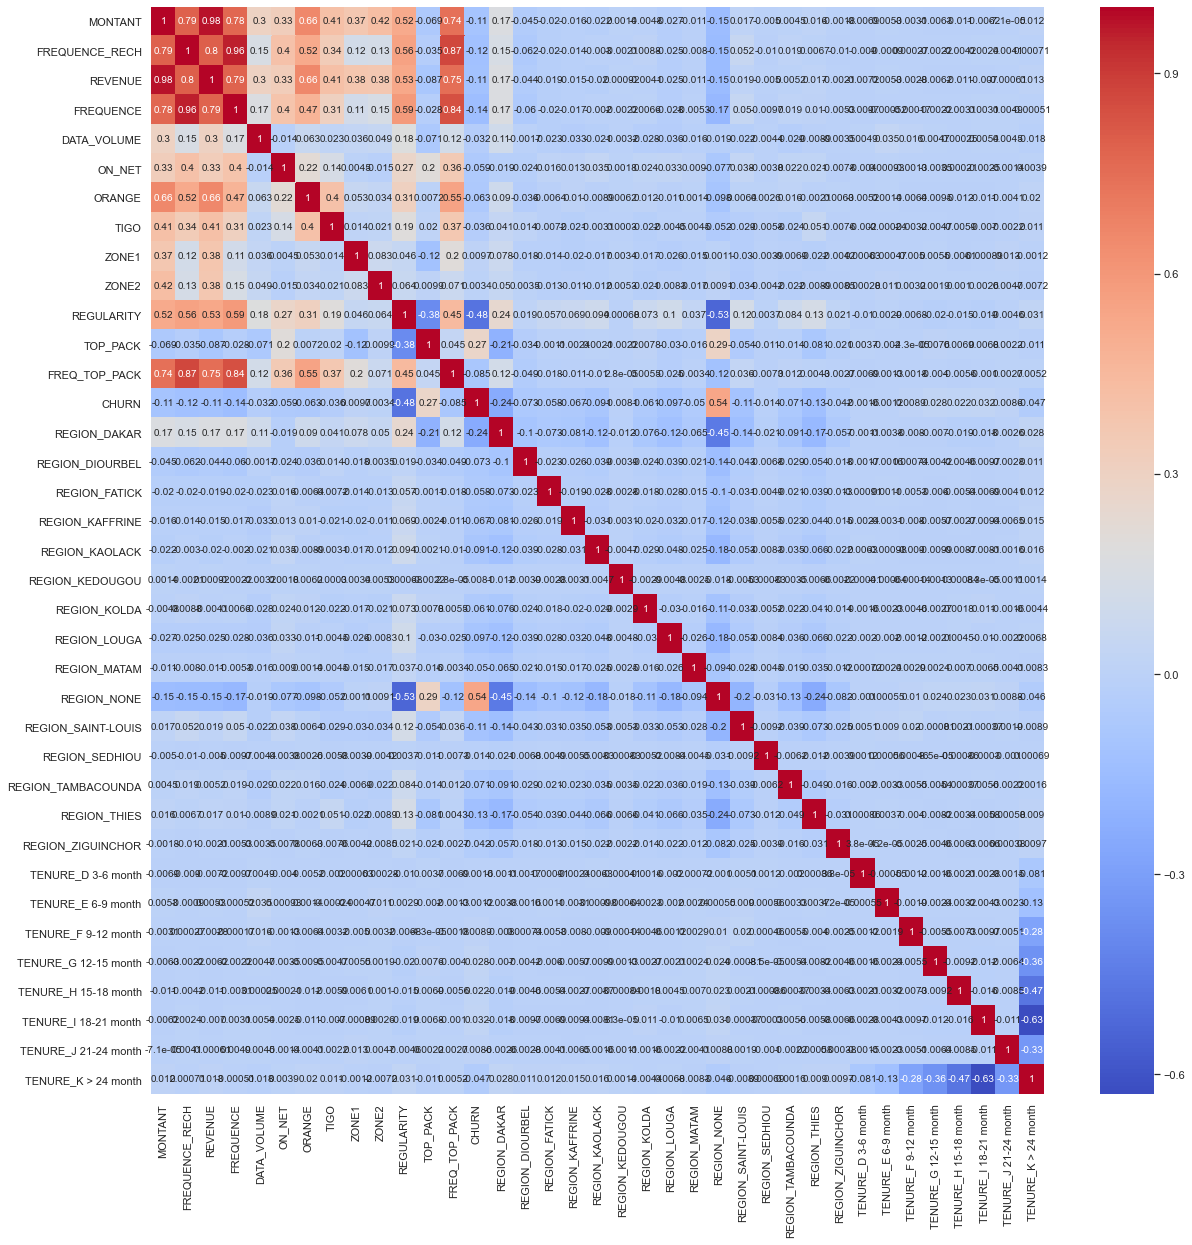

In [53]:
plt.figure(figsize=(20,20))

sns.heatmap(train.corr(), cmap='coolwarm', annot=True)

# Feature Engineering

In [54]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,11.529120,13.274070,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,5510.810334,7187.112880,1.0,1000.0,3000.0,7368.0,532177.0
FREQUENCE,1428000.0,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,277.689140,872.688909,0.0,5.0,27.0,156.0,50809.0
ORANGE,1258800.0,95.418711,204.987266,0.0,7.0,29.0,99.0,21323.0
TIGO,864032.0,23.109253,63.578086,0.0,2.0,6.0,20.0,4174.0
ZONE1,169721.0,8.170132,41.169511,0.0,0.0,1.0,3.0,4792.0
ZONE2,136824.0,7.553309,33.487234,0.0,0.0,2.0,5.0,3697.0


In [55]:
train.head()

,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,...,REGION_THIES,REGION_ZIGUINCHOR,TENURE_D 3-6 month,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,4250.0,15.0,4251.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
2,3600.0,2.0,1020.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
3,13500.0,15.0,13502.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,1000.0,1.0,985.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


## Lower Outliers for identifying possible 1 or churners

## Creating the new features

In [56]:
# create new feature
train['clue'] = 0
test['clue'] = 0


In [57]:
# Update new feature

def change(x):
    return 1

train['clue'] = train[(train['ZONE1'].isna()) & (train['REGULARITY']<=6) & (train['ZONE2'].isna()) & (train['TIGO'].isna()) & (train['DATA_VOLUME'].isna()) & (train['FREQ_TOP_PACK'].isna()) & (train['ORANGE'].isna()) & (train['ON_NET'].isna())   & (train['FREQUENCE_RECH'].isna()) & (train['REVENUE'].isna()) & (train['FREQUENCE'].isna())]['clue'].apply(change)

test['clue'] = test[(test['ZONE1'].isna()) & (test['REGULARITY']<=6) & (test['ZONE2'].isna()) & (test['TIGO'].isna()) & (test['DATA_VOLUME'].isna()) & (test['FREQ_TOP_PACK'].isna()) & (test['ORANGE'].isna()) & (test['ON_NET'].isna())   & (test['FREQUENCE_RECH'].isna()) & (test['REVENUE'].isna()) & (test['FREQUENCE'].isna())]['clue'].apply(change)


In [58]:
train['clue'].fillna(0, inplace=True)
test['clue'].fillna(0, inplace=True)


In [59]:
train.corr()['CHURN'].sort_values()

REGULARITY             -0.479991
REGION_DAKAR           -0.241162
FREQUENCE              -0.139363
REGION_THIES           -0.132493
FREQUENCE_RECH         -0.123439
REVENUE                -0.114079
REGION_SAINT-LOUIS     -0.108755
MONTANT                -0.105046
REGION_LOUGA           -0.096512
REGION_KAOLACK         -0.091288
FREQ_TOP_PACK          -0.085106
REGION_DIOURBEL        -0.073138
REGION_TAMBACOUNDA     -0.071452
REGION_KAFFRINE        -0.066693
ORANGE                 -0.063400
REGION_KOLDA           -0.061291
ON_NET                 -0.058698
REGION_FATICK          -0.057604
REGION_MATAM           -0.050190
TENURE_K > 24 month    -0.047414
REGION_ZIGUINCHOR      -0.041614
TIGO                   -0.035668
DATA_VOLUME            -0.032422
REGION_SEDHIOU         -0.014042
REGION_KEDOUGOU        -0.008107
TENURE_D 3-6 month     -0.001599
TENURE_E 6-9 month     -0.001177
ZONE2                   0.003379
TENURE_J 21-24 month    0.008558
TENURE_F 9-12 month     0.008885
ZONE1     

In [60]:
train.columns

Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'FREQUENCE', 'DATA_VOLUME',
       'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'REGULARITY', 'TOP_PACK',
       'FREQ_TOP_PACK', 'CHURN', 'REGION_DAKAR', 'REGION_DIOURBEL',
       'REGION_FATICK', 'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU',
       'REGION_KOLDA', 'REGION_LOUGA', 'REGION_MATAM', 'REGION_NONE',
       'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA',
       'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month',
       'TENURE_E 6-9 month', 'TENURE_F 9-12 month', 'TENURE_G 12-15 month',
       'TENURE_H 15-18 month', 'TENURE_I 18-21 month', 'TENURE_J 21-24 month',
       'TENURE_K > 24 month', 'clue'],
      dtype='object')

In [61]:
test.columns

Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'FREQUENCE', 'DATA_VOLUME',
       'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'REGULARITY', 'TOP_PACK',
       'FREQ_TOP_PACK', 'REGION_DAKAR', 'REGION_DIOURBEL', 'REGION_FATICK',
       'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA',
       'REGION_LOUGA', 'REGION_MATAM', 'REGION_NONE', 'REGION_SAINT-LOUIS',
       'REGION_SEDHIOU', 'REGION_TAMBACOUNDA', 'REGION_THIES',
       'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month', 'TENURE_E 6-9 month',
       'TENURE_F 9-12 month', 'TENURE_G 12-15 month', 'TENURE_H 15-18 month',
       'TENURE_I 18-21 month', 'TENURE_J 21-24 month', 'TENURE_K > 24 month',
       'clue'],
      dtype='object')

In [62]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=5)

train1 = train[['REGULARITY', 'REGION_NONE', 'REGION_DAKAR', 'clue', 'TOP_PACK']]
test1 = test[['REGULARITY', 'REGION_NONE', 'REGION_DAKAR', 'clue', 'TOP_PACK']]

train['kmeans'] = km.fit_predict(train1)
test['kmeans'] = km.predict(test1)

In [63]:
from sklearn.cluster import KMeans

km2 = KMeans(n_clusters=2, random_state=5)

train1 = train[['REGULARITY', 'REGION_NONE', 'REGION_DAKAR', 'clue', 'TOP_PACK']]
test1 = test[['REGULARITY', 'REGION_NONE', 'REGION_DAKAR', 'clue', 'TOP_PACK']]

train['kmeans2'] = km2.fit_predict(train1)
test['kmeans2'] = km2.predict(test1)

In [64]:
train['kmeans'].value_counts()

2    943733
0    459593
1    440586
3    310136
Name: kmeans, dtype: int64

In [65]:
train['kmeans2'].value_counts()

1    1403038
0     751010
Name: kmeans2, dtype: int64

In [66]:
train[train['kmeans']==2]['CHURN'].value_counts()

0.0    581315
1.0    362418
Name: CHURN, dtype: int64

In [67]:
train[train['kmeans2']==1]['CHURN'].value_counts()

0.0    1033315
1.0     369723
Name: CHURN, dtype: int64

In [68]:
# train1 = train[train['kmeans']==2].drop('kmeans', axis=1).reset_index(drop=True)
# train2 = train[train['kmeans2']==1].drop('kmeans2', axis=1).reset_index(drop=True)
# train3 = train[train['REGION_NONE']==1].drop('REGION_NONE', axis=1).reset_index(drop=True)
# train4 = train[train['clue']==1].drop('clue', axis=1).reset_index(drop=True)
# train5 = train[train['TOP_PACK']==107.0].drop('TOP_PACK', axis=1).reset_index(drop=True)

In [69]:
# test1 = test[test['kmeans']==2].drop('kmeans', axis=1).reset_index(drop=True)
# test2 = test[test['kmeans2']==1].drop('kmeans2', axis=1).reset_index(drop=True)
# test3 = test[test['REGION_NONE']==1].drop('REGION_NONE', axis=1).reset_index(drop=True)
# test4 = test[test['clue']==1].drop('clue', axis=1).reset_index(drop=True)
# test5 = test[test['TOP_PACK']==107.0].drop('TOP_PACK', axis=1).reset_index(drop=True)

In [70]:
pd.set_option('display.max_columns', 50)

train.head(20)

,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,REGION_DAKAR,REGION_DIOURBEL,REGION_FATICK,REGION_KAFFRINE,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_NONE,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,TENURE_D 3-6 month,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month,clue,kmeans,kmeans2
0,4250.0,15.0,4251.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,110.0,8.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,107.0,NaN,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0,2,1
2,3600.0,2.0,1020.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,17,111.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,2,1
3,13500.0,15.0,13502.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,62,35.0,11.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0
4,1000.0,1.0,985.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,11,102.0,2.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,2,1
5,8500.0,17.0,9000.0,18.0,NaN,252.0,70.0,91.0,NaN,NaN,62,98.0,18.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,1
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,107.0,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,2,1
7,7000.0,16.0,7229.0,22.0,1601.0,77.0,29.0,100.0,NaN,NaN,55,18.0,8.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0
8,1500.0,3.0,1502.0,12.0,NaN,2.0,53.0,2.0,NaN,NaN,31,107.0,NaN,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,1
9,4000.0,8.0,4000.0,8.0,NaN,1620.0,9.0,NaN,NaN,NaN,45,116.0,8.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.0,0,1


In [71]:
train.corr()['CHURN'].sort_values()

REGULARITY             -0.479991
REGION_DAKAR           -0.241162
FREQUENCE              -0.139363
REGION_THIES           -0.132493
FREQUENCE_RECH         -0.123439
REVENUE                -0.114079
REGION_SAINT-LOUIS     -0.108755
MONTANT                -0.105046
REGION_LOUGA           -0.096512
REGION_KAOLACK         -0.091288
FREQ_TOP_PACK          -0.085106
REGION_DIOURBEL        -0.073138
REGION_TAMBACOUNDA     -0.071452
REGION_KAFFRINE        -0.066693
ORANGE                 -0.063400
REGION_KOLDA           -0.061291
ON_NET                 -0.058698
REGION_FATICK          -0.057604
REGION_MATAM           -0.050190
TENURE_K > 24 month    -0.047414
REGION_ZIGUINCHOR      -0.041614
TIGO                   -0.035668
DATA_VOLUME            -0.032422
REGION_SEDHIOU         -0.014042
REGION_KEDOUGOU        -0.008107
TENURE_D 3-6 month     -0.001599
TENURE_E 6-9 month     -0.001177
ZONE2                   0.003379
TENURE_J 21-24 month    0.008558
TENURE_F 9-12 month     0.008885
ZONE1     

# Splitting the data

In [72]:
# cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'FREQUENCE', 'DATA_VOLUME',
#        'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'REGULARITY', 'TOP_PACK',
#        'FREQ_TOP_PACK', 'REGION_KAOLACK', 'REGION_NONE', 'REGION_SAINT-LOUIS',
#        'REGION_TAMBACOUNDA', 'TENURE_K > 24 month', 'kmeans', 'CHURN']

# cols2 = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'FREQUENCE', 'DATA_VOLUME',
#        'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'REGULARITY', 'TOP_PACK',
#        'FREQ_TOP_PACK', 'REGION_KAOLACK', 'REGION_NONE', 'REGION_SAINT-LOUIS',
#        'REGION_TAMBACOUNDA', 'TENURE_K > 24 month', 'kmeans']

# train = train[cols]
# test = test[cols2]

In [73]:
X = train.drop(['CHURN'], axis=1)
y = train['CHURN']

In [74]:
X.shape, y.shape

((2154048, 39), (2154048,))

In [75]:
X.columns

Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'FREQUENCE', 'DATA_VOLUME',
       'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'REGULARITY', 'TOP_PACK',
       'FREQ_TOP_PACK', 'REGION_DAKAR', 'REGION_DIOURBEL', 'REGION_FATICK',
       'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA',
       'REGION_LOUGA', 'REGION_MATAM', 'REGION_NONE', 'REGION_SAINT-LOUIS',
       'REGION_SEDHIOU', 'REGION_TAMBACOUNDA', 'REGION_THIES',
       'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month', 'TENURE_E 6-9 month',
       'TENURE_F 9-12 month', 'TENURE_G 12-15 month', 'TENURE_H 15-18 month',
       'TENURE_I 18-21 month', 'TENURE_J 21-24 month', 'TENURE_K > 24 month',
       'clue', 'kmeans', 'kmeans2'],
      dtype='object')

In [76]:
train.shape, test.shape

((2154048, 40), (380127, 39))

# Feature Selection with RFECV

In [106]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

skf = StratifiedKFold(n_splits=10, shuffle=False)
#roc_auc = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)

cat = CatBoostClassifier(iterations=100, eval_metric='AUC', loss_function='Logloss', random_state=5, thread_count=-1, max_depth=7)


model = RFECV(estimator=cat, verbose=5, n_jobs=1, cv=skf, scoring='roc_auc', min_features_to_select=15)

model.fit(X_train, y_train)

Fitting estimator with 23 features.
Learning rate set to 0.5
0:	total: 122ms	remaining: 12s
1:	total: 223ms	remaining: 10.9s
2:	total: 306ms	remaining: 9.9s
3:	total: 390ms	remaining: 9.36s
4:	total: 495ms	remaining: 9.41s
5:	total: 601ms	remaining: 9.42s
6:	total: 704ms	remaining: 9.35s
7:	total: 833ms	remaining: 9.58s
8:	total: 924ms	remaining: 9.34s
9:	total: 1.02s	remaining: 9.18s
10:	total: 1.11s	remaining: 9.03s
11:	total: 1.21s	remaining: 8.88s
12:	total: 1.3s	remaining: 8.73s
13:	total: 1.4s	remaining: 8.61s
14:	total: 1.5s	remaining: 8.5s
15:	total: 1.59s	remaining: 8.37s
16:	total: 1.67s	remaining: 8.13s
17:	total: 1.75s	remaining: 7.99s
18:	total: 1.84s	remaining: 7.83s
19:	total: 1.92s	remaining: 7.66s
20:	total: 2.04s	remaining: 7.67s
21:	total: 2.15s	remaining: 7.61s
22:	total: 2.26s	remaining: 7.55s
23:	total: 2.37s	remaining: 7.52s
24:	total: 2.45s	remaining: 7.35s
25:	total: 2.55s	remaining: 7.25s
26:	total: 2.63s	remaining: 7.1s
27:	total: 2.72s	remaining: 6.99s
28:	t

41:	total: 3.96s	remaining: 5.48s
42:	total: 4.04s	remaining: 5.36s
43:	total: 4.12s	remaining: 5.24s
44:	total: 4.21s	remaining: 5.15s
45:	total: 4.29s	remaining: 5.04s
46:	total: 4.37s	remaining: 4.93s
47:	total: 4.46s	remaining: 4.83s
48:	total: 4.54s	remaining: 4.73s
49:	total: 4.62s	remaining: 4.62s
50:	total: 4.71s	remaining: 4.53s
51:	total: 4.79s	remaining: 4.42s
52:	total: 4.86s	remaining: 4.31s
53:	total: 4.95s	remaining: 4.21s
54:	total: 5.03s	remaining: 4.12s
55:	total: 5.1s	remaining: 4.01s
56:	total: 5.19s	remaining: 3.92s
57:	total: 5.27s	remaining: 3.81s
58:	total: 5.34s	remaining: 3.71s
59:	total: 5.43s	remaining: 3.62s
60:	total: 5.51s	remaining: 3.52s
61:	total: 5.59s	remaining: 3.42s
62:	total: 5.68s	remaining: 3.33s
63:	total: 5.75s	remaining: 3.23s
64:	total: 5.83s	remaining: 3.14s
65:	total: 5.92s	remaining: 3.05s
66:	total: 5.99s	remaining: 2.95s
67:	total: 6.06s	remaining: 2.85s
68:	total: 6.15s	remaining: 2.76s
69:	total: 6.22s	remaining: 2.67s
70:	total: 6.3s

81:	total: 4.49s	remaining: 986ms
82:	total: 4.54s	remaining: 931ms
83:	total: 4.59s	remaining: 875ms
84:	total: 4.65s	remaining: 820ms
85:	total: 4.69s	remaining: 763ms
86:	total: 4.74s	remaining: 709ms
87:	total: 4.79s	remaining: 653ms
88:	total: 4.84s	remaining: 598ms
89:	total: 4.88s	remaining: 542ms
90:	total: 4.92s	remaining: 487ms
91:	total: 4.97s	remaining: 432ms
92:	total: 5.01s	remaining: 377ms
93:	total: 5.05s	remaining: 322ms
94:	total: 5.1s	remaining: 269ms
95:	total: 5.15s	remaining: 215ms
96:	total: 5.19s	remaining: 161ms
97:	total: 5.24s	remaining: 107ms
98:	total: 5.28s	remaining: 53.3ms
99:	total: 5.33s	remaining: 0us
Fitting estimator with 18 features.
Learning rate set to 0.5
0:	total: 88.3ms	remaining: 8.74s
1:	total: 141ms	remaining: 6.9s
2:	total: 193ms	remaining: 6.23s
3:	total: 242ms	remaining: 5.8s
4:	total: 290ms	remaining: 5.51s
5:	total: 337ms	remaining: 5.28s
6:	total: 395ms	remaining: 5.25s
7:	total: 445ms	remaining: 5.12s
8:	total: 508ms	remaining: 5.14s

22:	total: 1.17s	remaining: 3.93s
23:	total: 1.22s	remaining: 3.85s
24:	total: 1.26s	remaining: 3.79s
25:	total: 1.31s	remaining: 3.73s
26:	total: 1.36s	remaining: 3.68s
27:	total: 1.42s	remaining: 3.66s
28:	total: 1.49s	remaining: 3.65s
29:	total: 1.56s	remaining: 3.64s
30:	total: 1.63s	remaining: 3.63s
31:	total: 1.7s	remaining: 3.61s
32:	total: 1.78s	remaining: 3.62s
33:	total: 1.84s	remaining: 3.57s
34:	total: 1.92s	remaining: 3.56s
35:	total: 2s	remaining: 3.56s
36:	total: 2.07s	remaining: 3.52s
37:	total: 2.14s	remaining: 3.49s
38:	total: 2.21s	remaining: 3.46s
39:	total: 2.28s	remaining: 3.43s
40:	total: 2.33s	remaining: 3.35s
41:	total: 2.39s	remaining: 3.31s
42:	total: 2.45s	remaining: 3.25s
43:	total: 2.5s	remaining: 3.18s
44:	total: 2.54s	remaining: 3.11s
45:	total: 2.6s	remaining: 3.06s
46:	total: 2.65s	remaining: 2.99s
47:	total: 2.69s	remaining: 2.92s
48:	total: 2.74s	remaining: 2.85s
49:	total: 2.79s	remaining: 2.79s
50:	total: 2.83s	remaining: 2.72s
51:	total: 2.88s	rem

64:	total: 5.86s	remaining: 3.15s
65:	total: 5.96s	remaining: 3.07s
66:	total: 6.05s	remaining: 2.98s
67:	total: 6.15s	remaining: 2.9s
68:	total: 6.26s	remaining: 2.81s
69:	total: 6.36s	remaining: 2.73s
70:	total: 6.44s	remaining: 2.63s
71:	total: 6.52s	remaining: 2.54s
72:	total: 6.6s	remaining: 2.44s
73:	total: 6.71s	remaining: 2.36s
74:	total: 6.81s	remaining: 2.27s
75:	total: 6.96s	remaining: 2.2s
76:	total: 7.05s	remaining: 2.11s
77:	total: 7.13s	remaining: 2.01s
78:	total: 7.21s	remaining: 1.92s
79:	total: 7.31s	remaining: 1.83s
80:	total: 7.46s	remaining: 1.75s
81:	total: 7.63s	remaining: 1.67s
82:	total: 7.78s	remaining: 1.59s
83:	total: 7.93s	remaining: 1.51s
84:	total: 8.1s	remaining: 1.43s
85:	total: 8.32s	remaining: 1.35s
86:	total: 8.49s	remaining: 1.27s
87:	total: 8.64s	remaining: 1.18s
88:	total: 8.77s	remaining: 1.08s
89:	total: 8.9s	remaining: 989ms
90:	total: 9s	remaining: 890ms
91:	total: 9.11s	remaining: 792ms
92:	total: 9.23s	remaining: 695ms
93:	total: 9.36s	remai

5:	total: 654ms	remaining: 10.2s
6:	total: 732ms	remaining: 9.72s
7:	total: 819ms	remaining: 9.41s
8:	total: 905ms	remaining: 9.15s
9:	total: 993ms	remaining: 8.94s
10:	total: 1.07s	remaining: 8.67s
11:	total: 1.15s	remaining: 8.46s
12:	total: 1.22s	remaining: 8.19s
13:	total: 1.3s	remaining: 7.98s
14:	total: 1.38s	remaining: 7.8s
15:	total: 1.45s	remaining: 7.63s
16:	total: 1.54s	remaining: 7.51s
17:	total: 1.64s	remaining: 7.48s
18:	total: 1.74s	remaining: 7.42s
19:	total: 1.85s	remaining: 7.4s
20:	total: 1.96s	remaining: 7.38s
21:	total: 2.06s	remaining: 7.32s
22:	total: 2.16s	remaining: 7.24s
23:	total: 2.25s	remaining: 7.13s
24:	total: 2.36s	remaining: 7.08s
25:	total: 2.44s	remaining: 6.94s
26:	total: 2.52s	remaining: 6.83s
27:	total: 2.61s	remaining: 6.71s
28:	total: 2.7s	remaining: 6.62s
29:	total: 2.79s	remaining: 6.52s
30:	total: 2.88s	remaining: 6.4s
31:	total: 2.99s	remaining: 6.35s
32:	total: 3.08s	remaining: 6.25s
33:	total: 3.16s	remaining: 6.13s
34:	total: 3.25s	remaini

46:	total: 2.37s	remaining: 2.67s
47:	total: 2.41s	remaining: 2.61s
48:	total: 2.45s	remaining: 2.55s
49:	total: 2.49s	remaining: 2.49s
50:	total: 2.54s	remaining: 2.44s
51:	total: 2.58s	remaining: 2.38s
52:	total: 2.62s	remaining: 2.32s
53:	total: 2.66s	remaining: 2.27s
54:	total: 2.71s	remaining: 2.22s
55:	total: 2.76s	remaining: 2.17s
56:	total: 2.8s	remaining: 2.11s
57:	total: 2.84s	remaining: 2.06s
58:	total: 2.88s	remaining: 2s
59:	total: 2.93s	remaining: 1.96s
60:	total: 2.98s	remaining: 1.91s
61:	total: 3.02s	remaining: 1.85s
62:	total: 3.06s	remaining: 1.8s
63:	total: 3.12s	remaining: 1.75s
64:	total: 3.17s	remaining: 1.71s
65:	total: 3.21s	remaining: 1.65s
66:	total: 3.25s	remaining: 1.6s
67:	total: 3.3s	remaining: 1.55s
68:	total: 3.35s	remaining: 1.51s
69:	total: 3.41s	remaining: 1.46s
70:	total: 3.46s	remaining: 1.41s
71:	total: 3.5s	remaining: 1.36s
72:	total: 3.57s	remaining: 1.32s
73:	total: 3.61s	remaining: 1.27s
74:	total: 3.65s	remaining: 1.22s
75:	total: 3.7s	remain

86:	total: 4.38s	remaining: 654ms
87:	total: 4.42s	remaining: 603ms
88:	total: 4.46s	remaining: 551ms
89:	total: 4.51s	remaining: 501ms
90:	total: 4.56s	remaining: 451ms
91:	total: 4.61s	remaining: 401ms
92:	total: 4.66s	remaining: 351ms
93:	total: 4.71s	remaining: 300ms
94:	total: 4.76s	remaining: 250ms
95:	total: 4.8s	remaining: 200ms
96:	total: 4.84s	remaining: 150ms
97:	total: 4.88s	remaining: 99.6ms
98:	total: 4.93s	remaining: 49.8ms
99:	total: 4.98s	remaining: 0us
Learning rate set to 0.5
0:	total: 72.1ms	remaining: 7.13s
1:	total: 137ms	remaining: 6.73s
2:	total: 212ms	remaining: 6.84s
3:	total: 281ms	remaining: 6.74s
4:	total: 350ms	remaining: 6.64s
5:	total: 420ms	remaining: 6.58s
6:	total: 486ms	remaining: 6.46s
7:	total: 572ms	remaining: 6.58s
8:	total: 648ms	remaining: 6.55s
9:	total: 711ms	remaining: 6.4s
10:	total: 792ms	remaining: 6.41s
11:	total: 859ms	remaining: 6.3s
12:	total: 918ms	remaining: 6.14s
13:	total: 975ms	remaining: 5.99s
14:	total: 1.02s	remaining: 5.81s
1

26:	total: 2.42s	remaining: 6.55s
27:	total: 2.55s	remaining: 6.56s
28:	total: 2.68s	remaining: 6.56s
29:	total: 2.8s	remaining: 6.53s
30:	total: 2.93s	remaining: 6.52s
31:	total: 3.07s	remaining: 6.53s
32:	total: 3.18s	remaining: 6.45s
33:	total: 3.27s	remaining: 6.34s
34:	total: 3.34s	remaining: 6.21s
35:	total: 3.43s	remaining: 6.11s
36:	total: 3.51s	remaining: 5.98s
37:	total: 3.6s	remaining: 5.87s
38:	total: 3.68s	remaining: 5.75s
39:	total: 3.76s	remaining: 5.64s
40:	total: 3.83s	remaining: 5.52s
41:	total: 3.91s	remaining: 5.4s
42:	total: 3.99s	remaining: 5.29s
43:	total: 4.07s	remaining: 5.17s
44:	total: 4.16s	remaining: 5.08s
45:	total: 4.24s	remaining: 4.97s
46:	total: 4.31s	remaining: 4.86s
47:	total: 4.4s	remaining: 4.76s
48:	total: 4.47s	remaining: 4.66s
49:	total: 4.55s	remaining: 4.55s
50:	total: 4.63s	remaining: 4.45s
51:	total: 4.71s	remaining: 4.35s
52:	total: 4.79s	remaining: 4.25s
53:	total: 4.86s	remaining: 4.14s
54:	total: 4.94s	remaining: 4.04s
55:	total: 5.01s	r

68:	total: 6.07s	remaining: 2.73s
69:	total: 6.15s	remaining: 2.64s
70:	total: 6.23s	remaining: 2.55s
71:	total: 6.32s	remaining: 2.46s
72:	total: 6.4s	remaining: 2.37s
73:	total: 6.48s	remaining: 2.28s
74:	total: 6.57s	remaining: 2.19s
75:	total: 6.65s	remaining: 2.1s
76:	total: 6.73s	remaining: 2.01s
77:	total: 6.82s	remaining: 1.92s
78:	total: 6.9s	remaining: 1.83s
79:	total: 7s	remaining: 1.75s
80:	total: 7.13s	remaining: 1.67s
81:	total: 7.25s	remaining: 1.59s
82:	total: 7.38s	remaining: 1.51s
83:	total: 7.51s	remaining: 1.43s
84:	total: 7.64s	remaining: 1.35s
85:	total: 7.74s	remaining: 1.26s
86:	total: 7.87s	remaining: 1.18s
87:	total: 7.96s	remaining: 1.08s
88:	total: 8.04s	remaining: 993ms
89:	total: 8.12s	remaining: 902ms
90:	total: 8.21s	remaining: 812ms
91:	total: 8.31s	remaining: 723ms
92:	total: 8.4s	remaining: 632ms
93:	total: 8.48s	remaining: 541ms
94:	total: 8.57s	remaining: 451ms
95:	total: 8.65s	remaining: 360ms
96:	total: 8.73s	remaining: 270ms
97:	total: 8.82s	rema

8:	total: 574ms	remaining: 5.8s
9:	total: 621ms	remaining: 5.59s
10:	total: 663ms	remaining: 5.36s
11:	total: 708ms	remaining: 5.19s
12:	total: 758ms	remaining: 5.07s
13:	total: 804ms	remaining: 4.94s
14:	total: 854ms	remaining: 4.84s
15:	total: 898ms	remaining: 4.71s
16:	total: 948ms	remaining: 4.63s
17:	total: 991ms	remaining: 4.51s
18:	total: 1.04s	remaining: 4.44s
19:	total: 1.08s	remaining: 4.34s
20:	total: 1.14s	remaining: 4.27s
21:	total: 1.18s	remaining: 4.18s
22:	total: 1.22s	remaining: 4.09s
23:	total: 1.27s	remaining: 4.02s
24:	total: 1.32s	remaining: 3.96s
25:	total: 1.36s	remaining: 3.88s
26:	total: 1.41s	remaining: 3.8s
27:	total: 1.45s	remaining: 3.73s
28:	total: 1.5s	remaining: 3.69s
29:	total: 1.55s	remaining: 3.61s
30:	total: 1.59s	remaining: 3.54s
31:	total: 1.63s	remaining: 3.47s
32:	total: 1.67s	remaining: 3.4s
33:	total: 1.73s	remaining: 3.35s
34:	total: 1.77s	remaining: 3.29s
35:	total: 1.81s	remaining: 3.23s
36:	total: 1.85s	remaining: 3.16s
37:	total: 1.89s	rem

50:	total: 2.88s	remaining: 2.77s
51:	total: 2.93s	remaining: 2.7s
52:	total: 2.98s	remaining: 2.65s
53:	total: 3.06s	remaining: 2.61s
54:	total: 3.14s	remaining: 2.57s
55:	total: 3.2s	remaining: 2.52s
56:	total: 3.29s	remaining: 2.48s
57:	total: 3.35s	remaining: 2.42s
58:	total: 3.41s	remaining: 2.37s
59:	total: 3.48s	remaining: 2.32s
60:	total: 3.55s	remaining: 2.27s
61:	total: 3.6s	remaining: 2.21s
62:	total: 3.68s	remaining: 2.16s
63:	total: 3.75s	remaining: 2.11s
64:	total: 3.83s	remaining: 2.06s
65:	total: 3.9s	remaining: 2.01s
66:	total: 3.98s	remaining: 1.96s
67:	total: 4.07s	remaining: 1.91s
68:	total: 4.15s	remaining: 1.86s
69:	total: 4.25s	remaining: 1.82s
70:	total: 4.35s	remaining: 1.78s
71:	total: 4.42s	remaining: 1.72s
72:	total: 4.5s	remaining: 1.66s
73:	total: 4.58s	remaining: 1.61s
74:	total: 4.66s	remaining: 1.55s
75:	total: 4.74s	remaining: 1.5s
76:	total: 4.84s	remaining: 1.45s
77:	total: 4.92s	remaining: 1.39s
78:	total: 5.02s	remaining: 1.33s
79:	total: 5.11s	rem

90:	total: 7.91s	remaining: 782ms
91:	total: 7.99s	remaining: 695ms
92:	total: 8.07s	remaining: 608ms
93:	total: 8.16s	remaining: 521ms
94:	total: 8.24s	remaining: 434ms
95:	total: 8.31s	remaining: 346ms
96:	total: 8.39s	remaining: 260ms
97:	total: 8.47s	remaining: 173ms
98:	total: 8.55s	remaining: 86.3ms
99:	total: 8.64s	remaining: 0us
Fitting estimator with 21 features.
Learning rate set to 0.5
0:	total: 155ms	remaining: 15.4s
1:	total: 264ms	remaining: 13s
2:	total: 398ms	remaining: 12.9s
3:	total: 523ms	remaining: 12.5s
4:	total: 672ms	remaining: 12.8s
5:	total: 803ms	remaining: 12.6s
6:	total: 955ms	remaining: 12.7s
7:	total: 1.08s	remaining: 12.4s
8:	total: 1.19s	remaining: 12s
9:	total: 1.28s	remaining: 11.5s
10:	total: 1.35s	remaining: 11s
11:	total: 1.44s	remaining: 10.6s
12:	total: 1.52s	remaining: 10.2s
13:	total: 1.59s	remaining: 9.78s
14:	total: 1.68s	remaining: 9.51s
15:	total: 1.76s	remaining: 9.22s
16:	total: 1.83s	remaining: 8.96s
17:	total: 1.92s	remaining: 8.77s
18:	

28:	total: 1.54s	remaining: 3.78s
29:	total: 1.59s	remaining: 3.72s
30:	total: 1.64s	remaining: 3.65s
31:	total: 1.68s	remaining: 3.57s
32:	total: 1.73s	remaining: 3.52s
33:	total: 1.78s	remaining: 3.46s
34:	total: 1.84s	remaining: 3.42s
35:	total: 1.89s	remaining: 3.36s
36:	total: 1.93s	remaining: 3.29s
37:	total: 1.98s	remaining: 3.23s
38:	total: 2.02s	remaining: 3.17s
39:	total: 2.07s	remaining: 3.1s
40:	total: 2.11s	remaining: 3.04s
41:	total: 2.2s	remaining: 3.04s
42:	total: 2.24s	remaining: 2.97s
43:	total: 2.29s	remaining: 2.91s
44:	total: 2.34s	remaining: 2.86s
45:	total: 2.39s	remaining: 2.81s
46:	total: 2.44s	remaining: 2.75s
47:	total: 2.48s	remaining: 2.69s
48:	total: 2.52s	remaining: 2.62s
49:	total: 2.56s	remaining: 2.56s
50:	total: 2.6s	remaining: 2.5s
51:	total: 2.64s	remaining: 2.44s
52:	total: 2.68s	remaining: 2.38s
53:	total: 2.72s	remaining: 2.32s
54:	total: 2.76s	remaining: 2.26s
55:	total: 2.82s	remaining: 2.22s
56:	total: 2.87s	remaining: 2.16s
57:	total: 2.9s	re

69:	total: 3.5s	remaining: 1.5s
70:	total: 3.55s	remaining: 1.45s
71:	total: 3.6s	remaining: 1.4s
72:	total: 3.66s	remaining: 1.35s
73:	total: 3.71s	remaining: 1.3s
74:	total: 3.79s	remaining: 1.26s
75:	total: 3.84s	remaining: 1.21s
76:	total: 3.91s	remaining: 1.17s
77:	total: 3.97s	remaining: 1.12s
78:	total: 4.03s	remaining: 1.07s
79:	total: 4.09s	remaining: 1.02s
80:	total: 4.17s	remaining: 978ms
81:	total: 4.24s	remaining: 931ms
82:	total: 4.31s	remaining: 882ms
83:	total: 4.39s	remaining: 836ms
84:	total: 4.47s	remaining: 789ms
85:	total: 4.54s	remaining: 739ms
86:	total: 4.6s	remaining: 688ms
87:	total: 4.66s	remaining: 636ms
88:	total: 4.72s	remaining: 584ms
89:	total: 4.79s	remaining: 532ms
90:	total: 4.85s	remaining: 480ms
91:	total: 4.91s	remaining: 427ms
92:	total: 4.96s	remaining: 373ms
93:	total: 5.01s	remaining: 320ms
94:	total: 5.07s	remaining: 267ms
95:	total: 5.12s	remaining: 213ms
96:	total: 5.16s	remaining: 160ms
97:	total: 5.21s	remaining: 106ms
98:	total: 5.26s	rem

10:	total: 1.03s	remaining: 8.35s
11:	total: 1.11s	remaining: 8.13s
12:	total: 1.19s	remaining: 7.95s
13:	total: 1.25s	remaining: 7.68s
14:	total: 1.33s	remaining: 7.54s
15:	total: 1.41s	remaining: 7.38s
16:	total: 1.5s	remaining: 7.3s
17:	total: 1.57s	remaining: 7.17s
18:	total: 1.65s	remaining: 7.02s
19:	total: 1.73s	remaining: 6.92s
20:	total: 1.81s	remaining: 6.82s
21:	total: 1.89s	remaining: 6.69s
22:	total: 1.98s	remaining: 6.62s
23:	total: 2.06s	remaining: 6.52s
24:	total: 2.14s	remaining: 6.42s
25:	total: 2.23s	remaining: 6.36s
26:	total: 2.31s	remaining: 6.24s
27:	total: 2.39s	remaining: 6.14s
28:	total: 2.48s	remaining: 6.08s
29:	total: 2.56s	remaining: 5.96s
30:	total: 2.63s	remaining: 5.85s
31:	total: 2.71s	remaining: 5.77s
32:	total: 2.8s	remaining: 5.69s
33:	total: 2.88s	remaining: 5.6s
34:	total: 2.97s	remaining: 5.52s
35:	total: 3.05s	remaining: 5.42s
36:	total: 3.12s	remaining: 5.31s
37:	total: 3.22s	remaining: 5.25s
38:	total: 3.3s	remaining: 5.16s
39:	total: 3.38s	re

50:	total: 4.67s	remaining: 4.48s
51:	total: 4.74s	remaining: 4.38s
52:	total: 4.82s	remaining: 4.27s
53:	total: 4.89s	remaining: 4.17s
54:	total: 4.98s	remaining: 4.07s
55:	total: 5.06s	remaining: 3.98s
56:	total: 5.15s	remaining: 3.89s
57:	total: 5.23s	remaining: 3.79s
58:	total: 5.31s	remaining: 3.69s
59:	total: 5.39s	remaining: 3.6s
60:	total: 5.47s	remaining: 3.5s
61:	total: 5.55s	remaining: 3.4s
62:	total: 5.63s	remaining: 3.31s
63:	total: 5.71s	remaining: 3.21s
64:	total: 5.79s	remaining: 3.12s
65:	total: 5.88s	remaining: 3.03s
66:	total: 5.95s	remaining: 2.93s
67:	total: 6.04s	remaining: 2.84s
68:	total: 6.13s	remaining: 2.75s
69:	total: 6.21s	remaining: 2.66s
70:	total: 6.27s	remaining: 2.56s
71:	total: 6.36s	remaining: 2.47s
72:	total: 6.44s	remaining: 2.38s
73:	total: 6.51s	remaining: 2.29s
74:	total: 6.6s	remaining: 2.2s
75:	total: 6.68s	remaining: 2.11s
76:	total: 6.75s	remaining: 2.02s
77:	total: 6.83s	remaining: 1.93s
78:	total: 6.91s	remaining: 1.84s
79:	total: 6.99s	re

93:	total: 4.85s	remaining: 310ms
94:	total: 4.93s	remaining: 259ms
95:	total: 4.98s	remaining: 207ms
96:	total: 5.03s	remaining: 156ms
97:	total: 5.1s	remaining: 104ms
98:	total: 5.16s	remaining: 52.1ms
99:	total: 5.22s	remaining: 0us
Fitting estimator with 18 features.
Learning rate set to 0.5
0:	total: 102ms	remaining: 10.1s
1:	total: 158ms	remaining: 7.72s
2:	total: 206ms	remaining: 6.65s
3:	total: 264ms	remaining: 6.33s
4:	total: 323ms	remaining: 6.14s
5:	total: 398ms	remaining: 6.24s
6:	total: 462ms	remaining: 6.13s
7:	total: 536ms	remaining: 6.16s
8:	total: 618ms	remaining: 6.25s
9:	total: 688ms	remaining: 6.19s
10:	total: 749ms	remaining: 6.06s
11:	total: 811ms	remaining: 5.95s
12:	total: 888ms	remaining: 5.94s
13:	total: 950ms	remaining: 5.83s
14:	total: 1.02s	remaining: 5.76s
15:	total: 1.1s	remaining: 5.77s
16:	total: 1.16s	remaining: 5.64s
17:	total: 1.21s	remaining: 5.51s
18:	total: 1.27s	remaining: 5.42s
19:	total: 1.32s	remaining: 5.26s
20:	total: 1.36s	remaining: 5.12s


31:	total: 1.92s	remaining: 4.09s
32:	total: 1.96s	remaining: 3.99s
33:	total: 2.01s	remaining: 3.9s
34:	total: 2.06s	remaining: 3.82s
35:	total: 2.1s	remaining: 3.73s
36:	total: 2.15s	remaining: 3.65s
37:	total: 2.18s	remaining: 3.56s
38:	total: 2.22s	remaining: 3.47s
39:	total: 2.26s	remaining: 3.39s
40:	total: 2.3s	remaining: 3.31s
41:	total: 2.35s	remaining: 3.24s
42:	total: 2.4s	remaining: 3.18s
43:	total: 2.43s	remaining: 3.1s
44:	total: 2.49s	remaining: 3.04s
45:	total: 2.54s	remaining: 2.98s
46:	total: 2.57s	remaining: 2.9s
47:	total: 2.61s	remaining: 2.83s
48:	total: 2.65s	remaining: 2.75s
49:	total: 2.68s	remaining: 2.68s
50:	total: 2.73s	remaining: 2.62s
51:	total: 2.77s	remaining: 2.55s
52:	total: 2.8s	remaining: 2.49s
53:	total: 2.85s	remaining: 2.42s
54:	total: 2.9s	remaining: 2.38s
55:	total: 2.94s	remaining: 2.31s
56:	total: 2.98s	remaining: 2.25s
57:	total: 3.02s	remaining: 2.19s
58:	total: 3.06s	remaining: 2.13s
59:	total: 3.12s	remaining: 2.08s
60:	total: 3.17s	remai

72:	total: 6.54s	remaining: 2.42s
73:	total: 6.66s	remaining: 2.34s
74:	total: 6.78s	remaining: 2.26s
75:	total: 6.9s	remaining: 2.18s
76:	total: 7.03s	remaining: 2.1s
77:	total: 7.15s	remaining: 2.02s
78:	total: 7.27s	remaining: 1.93s
79:	total: 7.36s	remaining: 1.84s
80:	total: 7.44s	remaining: 1.74s
81:	total: 7.53s	remaining: 1.65s
82:	total: 7.61s	remaining: 1.56s
83:	total: 7.68s	remaining: 1.46s
84:	total: 7.78s	remaining: 1.37s
85:	total: 7.86s	remaining: 1.28s
86:	total: 7.94s	remaining: 1.19s
87:	total: 8.03s	remaining: 1.09s
88:	total: 8.12s	remaining: 1s
89:	total: 8.2s	remaining: 911ms
90:	total: 8.28s	remaining: 819ms
91:	total: 8.35s	remaining: 726ms
92:	total: 8.43s	remaining: 635ms
93:	total: 8.52s	remaining: 544ms
94:	total: 8.6s	remaining: 452ms
95:	total: 8.67s	remaining: 361ms
96:	total: 8.76s	remaining: 271ms
97:	total: 8.84s	remaining: 180ms
98:	total: 8.92s	remaining: 90.1ms
99:	total: 9.01s	remaining: 0us
Fitting estimator with 22 features.
Learning rate set to

12:	total: 1.39s	remaining: 9.32s
13:	total: 1.48s	remaining: 9.07s
14:	total: 1.55s	remaining: 8.81s
15:	total: 1.64s	remaining: 8.61s
16:	total: 1.72s	remaining: 8.38s
17:	total: 1.79s	remaining: 8.17s
18:	total: 1.88s	remaining: 8s
19:	total: 1.95s	remaining: 7.81s
20:	total: 2.05s	remaining: 7.7s
21:	total: 2.13s	remaining: 7.56s
22:	total: 2.21s	remaining: 7.4s
23:	total: 2.29s	remaining: 7.24s
24:	total: 2.37s	remaining: 7.12s
25:	total: 2.46s	remaining: 7s
26:	total: 2.53s	remaining: 6.85s
27:	total: 2.62s	remaining: 6.74s
28:	total: 2.7s	remaining: 6.61s
29:	total: 2.8s	remaining: 6.53s
30:	total: 2.88s	remaining: 6.41s
31:	total: 2.96s	remaining: 6.3s
32:	total: 3.04s	remaining: 6.17s
33:	total: 3.13s	remaining: 6.08s
34:	total: 3.24s	remaining: 6.02s
35:	total: 3.34s	remaining: 5.95s
36:	total: 3.46s	remaining: 5.9s
37:	total: 3.57s	remaining: 5.83s
38:	total: 3.68s	remaining: 5.76s
39:	total: 3.76s	remaining: 5.65s
40:	total: 3.85s	remaining: 5.54s
41:	total: 3.93s	remaining

56:	total: 2.97s	remaining: 2.24s
57:	total: 3.02s	remaining: 2.19s
58:	total: 3.06s	remaining: 2.12s
59:	total: 3.1s	remaining: 2.06s
60:	total: 3.16s	remaining: 2.02s
61:	total: 3.2s	remaining: 1.96s
62:	total: 3.25s	remaining: 1.91s
63:	total: 3.3s	remaining: 1.86s
64:	total: 3.35s	remaining: 1.8s
65:	total: 3.4s	remaining: 1.75s
66:	total: 3.45s	remaining: 1.7s
67:	total: 3.49s	remaining: 1.64s
68:	total: 3.52s	remaining: 1.58s
69:	total: 3.57s	remaining: 1.53s
70:	total: 3.61s	remaining: 1.47s
71:	total: 3.66s	remaining: 1.42s
72:	total: 3.7s	remaining: 1.37s
73:	total: 3.75s	remaining: 1.31s
74:	total: 3.8s	remaining: 1.26s
75:	total: 3.85s	remaining: 1.22s
76:	total: 3.89s	remaining: 1.16s
77:	total: 3.95s	remaining: 1.11s
78:	total: 3.99s	remaining: 1.06s
79:	total: 4.04s	remaining: 1.01s
80:	total: 4.09s	remaining: 961ms
81:	total: 4.14s	remaining: 909ms
82:	total: 4.2s	remaining: 860ms
83:	total: 4.24s	remaining: 808ms
84:	total: 4.3s	remaining: 759ms
85:	total: 4.34s	remaini

96:	total: 4.86s	remaining: 150ms
97:	total: 4.9s	remaining: 100ms
98:	total: 4.95s	remaining: 50ms
99:	total: 4.99s	remaining: 0us
Learning rate set to 0.5
0:	total: 107ms	remaining: 10.6s
1:	total: 155ms	remaining: 7.6s
2:	total: 212ms	remaining: 6.86s
3:	total: 260ms	remaining: 6.25s
4:	total: 311ms	remaining: 5.91s
5:	total: 356ms	remaining: 5.58s
6:	total: 427ms	remaining: 5.67s
7:	total: 471ms	remaining: 5.41s
8:	total: 520ms	remaining: 5.26s
9:	total: 577ms	remaining: 5.19s
10:	total: 629ms	remaining: 5.09s
11:	total: 677ms	remaining: 4.96s
12:	total: 726ms	remaining: 4.86s
13:	total: 768ms	remaining: 4.71s
14:	total: 819ms	remaining: 4.64s
15:	total: 861ms	remaining: 4.52s
16:	total: 904ms	remaining: 4.41s
17:	total: 947ms	remaining: 4.31s
18:	total: 999ms	remaining: 4.26s
19:	total: 1.04s	remaining: 4.17s
20:	total: 1.09s	remaining: 4.09s
21:	total: 1.13s	remaining: 4.01s
22:	total: 1.19s	remaining: 3.98s
23:	total: 1.24s	remaining: 3.92s
24:	total: 1.28s	remaining: 3.85s
25:	

37:	total: 3.31s	remaining: 5.39s
38:	total: 3.42s	remaining: 5.35s
39:	total: 3.52s	remaining: 5.28s
40:	total: 3.64s	remaining: 5.23s
41:	total: 3.75s	remaining: 5.17s
42:	total: 3.88s	remaining: 5.14s
43:	total: 4s	remaining: 5.1s
44:	total: 4.12s	remaining: 5.04s
45:	total: 4.23s	remaining: 4.97s
46:	total: 4.32s	remaining: 4.87s
47:	total: 4.4s	remaining: 4.76s
48:	total: 4.48s	remaining: 4.67s
49:	total: 4.57s	remaining: 4.57s
50:	total: 4.65s	remaining: 4.46s
51:	total: 4.74s	remaining: 4.38s
52:	total: 4.81s	remaining: 4.27s
53:	total: 4.89s	remaining: 4.16s
54:	total: 4.97s	remaining: 4.07s
55:	total: 5.06s	remaining: 3.97s
56:	total: 5.14s	remaining: 3.88s
57:	total: 5.25s	remaining: 3.8s
58:	total: 5.36s	remaining: 3.72s
59:	total: 5.46s	remaining: 3.64s
60:	total: 5.58s	remaining: 3.56s
61:	total: 5.68s	remaining: 3.48s
62:	total: 5.78s	remaining: 3.4s
63:	total: 5.86s	remaining: 3.29s
64:	total: 5.95s	remaining: 3.21s
65:	total: 6.03s	remaining: 3.1s
66:	total: 6.11s	remai

77:	total: 7.21s	remaining: 2.03s
78:	total: 7.33s	remaining: 1.95s
79:	total: 7.45s	remaining: 1.86s
80:	total: 7.56s	remaining: 1.77s
81:	total: 7.67s	remaining: 1.68s
82:	total: 7.77s	remaining: 1.59s
83:	total: 7.85s	remaining: 1.5s
84:	total: 7.94s	remaining: 1.4s
85:	total: 8.01s	remaining: 1.3s
86:	total: 8.1s	remaining: 1.21s
87:	total: 8.18s	remaining: 1.11s
88:	total: 8.25s	remaining: 1.02s
89:	total: 8.34s	remaining: 927ms
90:	total: 8.43s	remaining: 834ms
91:	total: 8.53s	remaining: 742ms
92:	total: 8.65s	remaining: 651ms
93:	total: 8.76s	remaining: 559ms
94:	total: 8.88s	remaining: 467ms
95:	total: 8.97s	remaining: 374ms
96:	total: 9.06s	remaining: 280ms
97:	total: 9.14s	remaining: 187ms
98:	total: 9.23s	remaining: 93.3ms
99:	total: 9.31s	remaining: 0us
Fitting estimator with 19 features.
Learning rate set to 0.5
0:	total: 91ms	remaining: 9.01s
1:	total: 145ms	remaining: 7.11s
2:	total: 201ms	remaining: 6.49s
3:	total: 252ms	remaining: 6.05s
4:	total: 300ms	remaining: 5.7s

17:	total: 1.03s	remaining: 4.68s
18:	total: 1.07s	remaining: 4.59s
19:	total: 1.12s	remaining: 4.48s
20:	total: 1.17s	remaining: 4.39s
21:	total: 1.22s	remaining: 4.33s
22:	total: 1.26s	remaining: 4.24s
23:	total: 1.31s	remaining: 4.15s
24:	total: 1.35s	remaining: 4.05s
25:	total: 1.4s	remaining: 3.99s
26:	total: 1.45s	remaining: 3.91s
27:	total: 1.49s	remaining: 3.83s
28:	total: 1.53s	remaining: 3.76s
29:	total: 1.59s	remaining: 3.71s
30:	total: 1.64s	remaining: 3.65s
31:	total: 1.69s	remaining: 3.59s
32:	total: 1.73s	remaining: 3.5s
33:	total: 1.77s	remaining: 3.44s
34:	total: 1.82s	remaining: 3.39s
35:	total: 1.86s	remaining: 3.31s
36:	total: 1.9s	remaining: 3.23s
37:	total: 1.94s	remaining: 3.16s
38:	total: 1.98s	remaining: 3.09s
39:	total: 2.03s	remaining: 3.05s
40:	total: 2.09s	remaining: 3.01s
41:	total: 2.15s	remaining: 2.97s
42:	total: 2.21s	remaining: 2.93s
43:	total: 2.25s	remaining: 2.87s
44:	total: 2.31s	remaining: 2.83s
45:	total: 2.37s	remaining: 2.78s
46:	total: 2.43s	

59:	total: 3.54s	remaining: 2.36s
60:	total: 3.6s	remaining: 2.3s
61:	total: 3.67s	remaining: 2.25s
62:	total: 3.74s	remaining: 2.2s
63:	total: 3.82s	remaining: 2.15s
64:	total: 3.88s	remaining: 2.09s
65:	total: 3.96s	remaining: 2.04s
66:	total: 4.04s	remaining: 1.99s
67:	total: 4.1s	remaining: 1.93s
68:	total: 4.16s	remaining: 1.87s
69:	total: 4.21s	remaining: 1.81s
70:	total: 4.27s	remaining: 1.74s
71:	total: 4.32s	remaining: 1.68s
72:	total: 4.38s	remaining: 1.62s
73:	total: 4.44s	remaining: 1.56s
74:	total: 4.49s	remaining: 1.5s
75:	total: 4.54s	remaining: 1.43s
76:	total: 4.59s	remaining: 1.37s
77:	total: 4.64s	remaining: 1.31s
78:	total: 4.69s	remaining: 1.25s
79:	total: 4.77s	remaining: 1.19s
80:	total: 4.87s	remaining: 1.14s
81:	total: 5s	remaining: 1.1s
82:	total: 5.05s	remaining: 1.03s
83:	total: 5.13s	remaining: 978ms
84:	total: 5.23s	remaining: 924ms
85:	total: 5.3s	remaining: 864ms
86:	total: 5.4s	remaining: 807ms
87:	total: 5.45s	remaining: 744ms
88:	total: 5.51s	remainin

Fitting estimator with 21 features.
Learning rate set to 0.5
0:	total: 137ms	remaining: 13.6s
1:	total: 222ms	remaining: 10.9s
2:	total: 299ms	remaining: 9.66s
3:	total: 416ms	remaining: 9.98s
4:	total: 496ms	remaining: 9.42s
5:	total: 570ms	remaining: 8.92s
6:	total: 656ms	remaining: 8.72s
7:	total: 736ms	remaining: 8.47s
8:	total: 838ms	remaining: 8.47s
9:	total: 964ms	remaining: 8.67s
10:	total: 1.09s	remaining: 8.83s
11:	total: 1.2s	remaining: 8.81s
12:	total: 1.33s	remaining: 8.88s
13:	total: 1.45s	remaining: 8.88s
14:	total: 1.56s	remaining: 8.82s
15:	total: 1.64s	remaining: 8.61s
16:	total: 1.73s	remaining: 8.43s
17:	total: 1.81s	remaining: 8.27s
18:	total: 1.89s	remaining: 8.07s
19:	total: 1.98s	remaining: 7.91s
20:	total: 2.07s	remaining: 7.78s
21:	total: 2.14s	remaining: 7.59s
22:	total: 2.22s	remaining: 7.42s
23:	total: 2.3s	remaining: 7.29s
24:	total: 2.38s	remaining: 7.13s
25:	total: 2.46s	remaining: 6.99s
26:	total: 2.55s	remaining: 6.9s
27:	total: 2.63s	remaining: 6.77s


41:	total: 2.46s	remaining: 3.4s
42:	total: 2.5s	remaining: 3.32s
43:	total: 2.56s	remaining: 3.25s
44:	total: 2.59s	remaining: 3.17s
45:	total: 2.63s	remaining: 3.08s
46:	total: 2.69s	remaining: 3.03s
47:	total: 2.73s	remaining: 2.96s
48:	total: 2.78s	remaining: 2.89s
49:	total: 2.81s	remaining: 2.81s
50:	total: 2.85s	remaining: 2.74s
51:	total: 2.9s	remaining: 2.67s
52:	total: 2.94s	remaining: 2.6s
53:	total: 2.97s	remaining: 2.53s
54:	total: 3.02s	remaining: 2.47s
55:	total: 3.06s	remaining: 2.41s
56:	total: 3.1s	remaining: 2.34s
57:	total: 3.14s	remaining: 2.28s
58:	total: 3.18s	remaining: 2.21s
59:	total: 3.23s	remaining: 2.15s
60:	total: 3.27s	remaining: 2.09s
61:	total: 3.33s	remaining: 2.04s
62:	total: 3.38s	remaining: 1.99s
63:	total: 3.43s	remaining: 1.93s
64:	total: 3.47s	remaining: 1.87s
65:	total: 3.52s	remaining: 1.81s
66:	total: 3.57s	remaining: 1.76s
67:	total: 3.62s	remaining: 1.7s
68:	total: 3.65s	remaining: 1.64s
69:	total: 3.69s	remaining: 1.58s
70:	total: 3.73s	rem

85:	total: 4.49s	remaining: 731ms
86:	total: 4.54s	remaining: 678ms
87:	total: 4.58s	remaining: 625ms
88:	total: 4.66s	remaining: 575ms
89:	total: 4.71s	remaining: 523ms
90:	total: 4.75s	remaining: 470ms
91:	total: 4.8s	remaining: 417ms
92:	total: 4.84s	remaining: 364ms
93:	total: 4.88s	remaining: 312ms
94:	total: 4.92s	remaining: 259ms
95:	total: 4.95s	remaining: 206ms
96:	total: 4.98s	remaining: 154ms
97:	total: 5.03s	remaining: 103ms
98:	total: 5.08s	remaining: 51.3ms
99:	total: 5.13s	remaining: 0us
Fitting estimator with 16 features.
Learning rate set to 0.5
0:	total: 52.3ms	remaining: 5.17s
1:	total: 97.6ms	remaining: 4.78s
2:	total: 148ms	remaining: 4.8s
3:	total: 201ms	remaining: 4.82s
4:	total: 244ms	remaining: 4.64s
5:	total: 307ms	remaining: 4.8s
6:	total: 385ms	remaining: 5.11s
7:	total: 444ms	remaining: 5.1s
8:	total: 501ms	remaining: 5.07s
9:	total: 555ms	remaining: 5s
10:	total: 606ms	remaining: 4.9s
11:	total: 666ms	remaining: 4.89s
12:	total: 734ms	remaining: 4.91s
13:	

27:	total: 2.73s	remaining: 7.03s
28:	total: 2.82s	remaining: 6.9s
29:	total: 2.9s	remaining: 6.76s
30:	total: 2.98s	remaining: 6.64s
31:	total: 3.06s	remaining: 6.51s
32:	total: 3.14s	remaining: 6.38s
33:	total: 3.23s	remaining: 6.26s
34:	total: 3.3s	remaining: 6.13s
35:	total: 3.38s	remaining: 6.01s
36:	total: 3.46s	remaining: 5.89s
37:	total: 3.54s	remaining: 5.78s
38:	total: 3.62s	remaining: 5.66s
39:	total: 3.71s	remaining: 5.57s
40:	total: 3.8s	remaining: 5.47s
41:	total: 3.88s	remaining: 5.36s
42:	total: 3.97s	remaining: 5.26s
43:	total: 4.04s	remaining: 5.14s
44:	total: 4.12s	remaining: 5.04s
45:	total: 4.2s	remaining: 4.93s
46:	total: 4.28s	remaining: 4.83s
47:	total: 4.36s	remaining: 4.73s
48:	total: 4.45s	remaining: 4.64s
49:	total: 4.53s	remaining: 4.53s
50:	total: 4.61s	remaining: 4.43s
51:	total: 4.69s	remaining: 4.33s
52:	total: 4.77s	remaining: 4.23s
53:	total: 4.84s	remaining: 4.13s
54:	total: 4.93s	remaining: 4.03s
55:	total: 5.01s	remaining: 3.94s
56:	total: 5.09s	re

67:	total: 6.18s	remaining: 2.91s
68:	total: 6.25s	remaining: 2.81s
69:	total: 6.34s	remaining: 2.71s
70:	total: 6.41s	remaining: 2.62s
71:	total: 6.51s	remaining: 2.53s
72:	total: 6.59s	remaining: 2.44s
73:	total: 6.67s	remaining: 2.34s
74:	total: 6.75s	remaining: 2.25s
75:	total: 6.83s	remaining: 2.16s
76:	total: 6.92s	remaining: 2.06s
77:	total: 6.99s	remaining: 1.97s
78:	total: 7.07s	remaining: 1.88s
79:	total: 7.16s	remaining: 1.79s
80:	total: 7.23s	remaining: 1.7s
81:	total: 7.32s	remaining: 1.6s
82:	total: 7.39s	remaining: 1.51s
83:	total: 7.47s	remaining: 1.42s
84:	total: 7.57s	remaining: 1.33s
85:	total: 7.66s	remaining: 1.25s
86:	total: 7.73s	remaining: 1.16s
87:	total: 7.81s	remaining: 1.06s
88:	total: 7.9s	remaining: 976ms
89:	total: 7.98s	remaining: 887ms
90:	total: 8.06s	remaining: 797ms
91:	total: 8.15s	remaining: 709ms
92:	total: 8.23s	remaining: 619ms
93:	total: 8.3s	remaining: 530ms
94:	total: 8.39s	remaining: 442ms
95:	total: 8.47s	remaining: 353ms
96:	total: 8.55s	r

7:	total: 422ms	remaining: 4.86s
8:	total: 482ms	remaining: 4.87s
9:	total: 531ms	remaining: 4.78s
10:	total: 586ms	remaining: 4.74s
11:	total: 631ms	remaining: 4.62s
12:	total: 675ms	remaining: 4.52s
13:	total: 718ms	remaining: 4.41s
14:	total: 765ms	remaining: 4.34s
15:	total: 821ms	remaining: 4.31s
16:	total: 869ms	remaining: 4.24s
17:	total: 912ms	remaining: 4.16s
18:	total: 968ms	remaining: 4.13s
19:	total: 1.01s	remaining: 4.05s
20:	total: 1.07s	remaining: 4.01s
21:	total: 1.11s	remaining: 3.95s
22:	total: 1.16s	remaining: 3.87s
23:	total: 1.2s	remaining: 3.8s
24:	total: 1.25s	remaining: 3.77s
25:	total: 1.31s	remaining: 3.74s
26:	total: 1.38s	remaining: 3.72s
27:	total: 1.44s	remaining: 3.69s
28:	total: 1.49s	remaining: 3.65s
29:	total: 1.55s	remaining: 3.61s
30:	total: 1.59s	remaining: 3.54s
31:	total: 1.64s	remaining: 3.49s
32:	total: 1.69s	remaining: 3.44s
33:	total: 1.75s	remaining: 3.4s
34:	total: 1.81s	remaining: 3.36s
35:	total: 1.86s	remaining: 3.31s
36:	total: 1.92s	rem

49:	total: 2.74s	remaining: 2.74s
50:	total: 2.8s	remaining: 2.69s
51:	total: 2.86s	remaining: 2.64s
52:	total: 2.92s	remaining: 2.59s
53:	total: 2.99s	remaining: 2.55s
54:	total: 3.05s	remaining: 2.5s
55:	total: 3.13s	remaining: 2.46s
56:	total: 3.18s	remaining: 2.4s
57:	total: 3.25s	remaining: 2.35s
58:	total: 3.31s	remaining: 2.3s
59:	total: 3.37s	remaining: 2.24s
60:	total: 3.42s	remaining: 2.18s
61:	total: 3.47s	remaining: 2.13s
62:	total: 3.52s	remaining: 2.06s
63:	total: 3.56s	remaining: 2s
64:	total: 3.6s	remaining: 1.94s
65:	total: 3.65s	remaining: 1.88s
66:	total: 3.7s	remaining: 1.82s
67:	total: 3.74s	remaining: 1.76s
68:	total: 3.79s	remaining: 1.7s
69:	total: 3.84s	remaining: 1.65s
70:	total: 3.88s	remaining: 1.59s
71:	total: 3.92s	remaining: 1.52s
72:	total: 3.96s	remaining: 1.47s
73:	total: 4.01s	remaining: 1.41s
74:	total: 4.06s	remaining: 1.35s
75:	total: 4.1s	remaining: 1.29s
76:	total: 4.15s	remaining: 1.24s
77:	total: 4.2s	remaining: 1.18s
78:	total: 4.25s	remaining

90:	total: 8.16s	remaining: 808ms
91:	total: 8.24s	remaining: 717ms
92:	total: 8.33s	remaining: 627ms
93:	total: 8.45s	remaining: 539ms
94:	total: 8.58s	remaining: 451ms
95:	total: 8.69s	remaining: 362ms
96:	total: 8.81s	remaining: 273ms
97:	total: 8.94s	remaining: 182ms
98:	total: 9.07s	remaining: 91.6ms
99:	total: 9.17s	remaining: 0us
Fitting estimator with 22 features.
Learning rate set to 0.5
0:	total: 108ms	remaining: 10.7s
1:	total: 191ms	remaining: 9.34s
2:	total: 266ms	remaining: 8.6s
3:	total: 345ms	remaining: 8.28s
4:	total: 453ms	remaining: 8.61s
5:	total: 545ms	remaining: 8.53s
6:	total: 620ms	remaining: 8.23s
7:	total: 706ms	remaining: 8.12s
8:	total: 780ms	remaining: 7.89s
9:	total: 857ms	remaining: 7.72s
10:	total: 953ms	remaining: 7.71s
11:	total: 1.03s	remaining: 7.58s
12:	total: 1.11s	remaining: 7.45s
13:	total: 1.2s	remaining: 7.39s
14:	total: 1.27s	remaining: 7.22s
15:	total: 1.35s	remaining: 7.1s
16:	total: 1.43s	remaining: 7s
17:	total: 1.51s	remaining: 6.87s
18:	

28:	total: 3.44s	remaining: 8.43s
29:	total: 3.54s	remaining: 8.27s
30:	total: 3.63s	remaining: 8.08s
31:	total: 3.77s	remaining: 8.02s
32:	total: 3.91s	remaining: 7.93s
33:	total: 4s	remaining: 7.77s
34:	total: 4.12s	remaining: 7.65s
35:	total: 4.26s	remaining: 7.57s
36:	total: 4.4s	remaining: 7.49s
37:	total: 4.51s	remaining: 7.36s
38:	total: 4.7s	remaining: 7.34s
39:	total: 4.84s	remaining: 7.26s
40:	total: 4.97s	remaining: 7.15s
41:	total: 5.12s	remaining: 7.07s
42:	total: 5.24s	remaining: 6.95s
43:	total: 5.35s	remaining: 6.81s
44:	total: 5.44s	remaining: 6.65s
45:	total: 5.54s	remaining: 6.51s
46:	total: 5.64s	remaining: 6.36s
47:	total: 5.76s	remaining: 6.24s
48:	total: 5.86s	remaining: 6.1s
49:	total: 5.96s	remaining: 5.96s
50:	total: 6.05s	remaining: 5.81s
51:	total: 6.15s	remaining: 5.67s
52:	total: 6.24s	remaining: 5.53s
53:	total: 6.33s	remaining: 5.39s
54:	total: 6.41s	remaining: 5.25s
55:	total: 6.5s	remaining: 5.11s
56:	total: 6.59s	remaining: 4.97s
57:	total: 6.67s	rema

69:	total: 3.74s	remaining: 1.6s
70:	total: 3.79s	remaining: 1.55s
71:	total: 3.85s	remaining: 1.5s
72:	total: 3.92s	remaining: 1.45s
73:	total: 4s	remaining: 1.41s
74:	total: 4.07s	remaining: 1.36s
75:	total: 4.16s	remaining: 1.31s
76:	total: 4.25s	remaining: 1.27s
77:	total: 4.34s	remaining: 1.22s
78:	total: 4.45s	remaining: 1.18s
79:	total: 4.53s	remaining: 1.13s
80:	total: 4.6s	remaining: 1.08s
81:	total: 4.7s	remaining: 1.03s
82:	total: 4.78s	remaining: 980ms
83:	total: 4.88s	remaining: 929ms
84:	total: 4.96s	remaining: 876ms
85:	total: 5.05s	remaining: 822ms
86:	total: 5.13s	remaining: 767ms
87:	total: 5.19s	remaining: 708ms
88:	total: 5.25s	remaining: 649ms
89:	total: 5.32s	remaining: 591ms
90:	total: 5.39s	remaining: 534ms
91:	total: 5.47s	remaining: 476ms
92:	total: 5.56s	remaining: 419ms
93:	total: 5.65s	remaining: 361ms
94:	total: 5.71s	remaining: 301ms
95:	total: 5.78s	remaining: 241ms
96:	total: 5.84s	remaining: 181ms
97:	total: 5.91s	remaining: 121ms
98:	total: 5.98s	rema

9:	total: 569ms	remaining: 5.12s
10:	total: 621ms	remaining: 5.03s
11:	total: 670ms	remaining: 4.91s
12:	total: 713ms	remaining: 4.77s
13:	total: 759ms	remaining: 4.66s
14:	total: 815ms	remaining: 4.62s
15:	total: 860ms	remaining: 4.52s
16:	total: 904ms	remaining: 4.41s
17:	total: 950ms	remaining: 4.33s
18:	total: 999ms	remaining: 4.26s
19:	total: 1.04s	remaining: 4.18s
20:	total: 1.08s	remaining: 4.08s
21:	total: 1.12s	remaining: 3.98s
22:	total: 1.17s	remaining: 3.93s
23:	total: 1.22s	remaining: 3.86s
24:	total: 1.26s	remaining: 3.77s
25:	total: 1.3s	remaining: 3.71s
26:	total: 1.35s	remaining: 3.64s
27:	total: 1.4s	remaining: 3.6s
28:	total: 1.48s	remaining: 3.61s
29:	total: 1.52s	remaining: 3.56s
30:	total: 1.57s	remaining: 3.51s
31:	total: 1.63s	remaining: 3.46s
32:	total: 1.68s	remaining: 3.41s
33:	total: 1.73s	remaining: 3.37s
34:	total: 1.8s	remaining: 3.34s
35:	total: 1.87s	remaining: 3.33s
36:	total: 1.94s	remaining: 3.3s
37:	total: 2.01s	remaining: 3.27s
38:	total: 2.09s	rem

49:	total: 5.57s	remaining: 5.57s
50:	total: 5.71s	remaining: 5.49s
51:	total: 5.85s	remaining: 5.4s
52:	total: 5.96s	remaining: 5.28s
53:	total: 6.05s	remaining: 5.16s
54:	total: 6.15s	remaining: 5.03s
55:	total: 6.24s	remaining: 4.9s
56:	total: 6.33s	remaining: 4.78s
57:	total: 6.42s	remaining: 4.65s
58:	total: 6.51s	remaining: 4.53s
59:	total: 6.6s	remaining: 4.4s
60:	total: 6.7s	remaining: 4.28s
61:	total: 6.79s	remaining: 4.16s
62:	total: 6.88s	remaining: 4.04s
63:	total: 7s	remaining: 3.94s
64:	total: 7.13s	remaining: 3.84s
65:	total: 7.25s	remaining: 3.74s
66:	total: 7.38s	remaining: 3.63s
67:	total: 7.5s	remaining: 3.53s
68:	total: 7.62s	remaining: 3.42s
69:	total: 7.71s	remaining: 3.31s
70:	total: 7.8s	remaining: 3.19s
71:	total: 7.89s	remaining: 3.07s
72:	total: 7.99s	remaining: 2.95s
73:	total: 8.17s	remaining: 2.87s
74:	total: 8.27s	remaining: 2.76s
75:	total: 8.35s	remaining: 2.64s
76:	total: 8.44s	remaining: 2.52s
77:	total: 8.54s	remaining: 2.41s
78:	total: 8.66s	remaini

91:	total: 9.25s	remaining: 804ms
92:	total: 9.33s	remaining: 702ms
93:	total: 9.41s	remaining: 601ms
94:	total: 9.51s	remaining: 500ms
95:	total: 9.6s	remaining: 400ms
96:	total: 9.69s	remaining: 300ms
97:	total: 9.78s	remaining: 200ms
98:	total: 9.87s	remaining: 99.7ms
99:	total: 9.96s	remaining: 0us
Fitting estimator with 19 features.
Learning rate set to 0.5
0:	total: 88.5ms	remaining: 8.76s
1:	total: 157ms	remaining: 7.68s
2:	total: 213ms	remaining: 6.89s
3:	total: 267ms	remaining: 6.4s
4:	total: 324ms	remaining: 6.15s
5:	total: 385ms	remaining: 6.03s
6:	total: 461ms	remaining: 6.12s
7:	total: 517ms	remaining: 5.95s
8:	total: 570ms	remaining: 5.76s
9:	total: 632ms	remaining: 5.69s
10:	total: 691ms	remaining: 5.59s
11:	total: 751ms	remaining: 5.51s
12:	total: 810ms	remaining: 5.42s
13:	total: 863ms	remaining: 5.3s
14:	total: 911ms	remaining: 5.16s
15:	total: 973ms	remaining: 5.11s
16:	total: 1.02s	remaining: 5s
17:	total: 1.07s	remaining: 4.88s
18:	total: 1.11s	remaining: 4.75s
19:

31:	total: 1.93s	remaining: 4.09s
32:	total: 1.99s	remaining: 4.05s
33:	total: 2.05s	remaining: 3.99s
34:	total: 2.12s	remaining: 3.95s
35:	total: 2.18s	remaining: 3.87s
36:	total: 2.23s	remaining: 3.8s
37:	total: 2.29s	remaining: 3.74s
38:	total: 2.35s	remaining: 3.68s
39:	total: 2.42s	remaining: 3.63s
40:	total: 2.49s	remaining: 3.58s
41:	total: 2.54s	remaining: 3.5s
42:	total: 2.59s	remaining: 3.43s
43:	total: 2.63s	remaining: 3.35s
44:	total: 2.68s	remaining: 3.27s
45:	total: 2.73s	remaining: 3.2s
46:	total: 2.78s	remaining: 3.14s
47:	total: 2.83s	remaining: 3.07s
48:	total: 2.87s	remaining: 2.99s
49:	total: 2.93s	remaining: 2.93s
50:	total: 2.98s	remaining: 2.87s
51:	total: 3.03s	remaining: 2.8s
52:	total: 3.08s	remaining: 2.73s
53:	total: 3.13s	remaining: 2.66s
54:	total: 3.17s	remaining: 2.6s
55:	total: 3.22s	remaining: 2.53s
56:	total: 3.27s	remaining: 2.47s
57:	total: 3.31s	remaining: 2.4s
58:	total: 3.37s	remaining: 2.34s
59:	total: 3.42s	remaining: 2.28s
60:	total: 3.46s	rem

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=<catboost.core.CatBoostClassifier object at 0x0000025D84C81F08>,
      min_features_to_select=15, n_jobs=1, scoring='roc_auc', verbose=5)

In [107]:
pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_rows', 5000)

pd.DataFrame([X.columns, model.support_])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK,REGION_KAOLACK,REGION_NONE,REGION_SAINT-LOUIS,REGION_TAMBACOUNDA,TENURE_K > 24 month,kmeans,kmeans3,kmeans4,kmeans5,kmeans6
1,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,False,False,True,True,False,True,True


In [108]:
model.n_features_

18

In [109]:
X.columns

Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'FREQUENCE', 'DATA_VOLUME',
       'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'REGULARITY', 'TOP_PACK',
       'FREQ_TOP_PACK', 'REGION_KAOLACK', 'REGION_NONE', 'REGION_SAINT-LOUIS',
       'REGION_TAMBACOUNDA', 'TENURE_K > 24 month', 'kmeans', 'kmeans3',
       'kmeans4', 'kmeans5', 'kmeans6'],
      dtype='object')

In [122]:
cols =['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'FREQUENCE', 'DATA_VOLUME',
       'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'REGULARITY', 'TOP_PACK',
       'FREQ_TOP_PACK', 'REGION_KAOLACK', 'REGION_NONE', 'REGION_SAINT-LOUIS',
       'REGION_TAMBACOUNDA', 'TENURE_K > 24 month', 'kmeans']

In [123]:
len(cols)

19

## Using RFECV, we find out that just 3 out of 16 features: Frequence, Regularity and Region, accounts for the majority of the ROC_AUC score (0.929) and accuracy (0.88). The rest of the features are composed almost entirely of noise; though there is some signal within them. I intend to retrieve the signal from these 13 features using PCA.

# Modelling

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5, stratify=y)

In [78]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, CatBoostRegressor
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from rgf.sklearn import RGFClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier, Lars, Lasso
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
# from mlens.ensemble import SuperLearner

In [87]:

ct = GaussianNB()
ct.fit(X_train.fillna(-1, axis=1), y_train)
predx = ct.predict(X_test.fillna(-1, axis=1))
pred4 = ct.predict_proba(X_test.fillna(-1, axis=1))
pred4 = [x[1] for x in pred4]
print(roc_auc_score(y_test, pred4))
print('\n')
print(classification_report(y_test, predx))

0.9040780650959155


              precision    recall  f1-score   support

         0.0       0.98      0.59      0.74   1662559
         1.0       0.35      0.96      0.51    383787

    accuracy                           0.66   2046346
   macro avg       0.67      0.78      0.63   2046346
weighted avg       0.86      0.66      0.70   2046346



In [86]:
random_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 4, 5, 6, 10],
    'min_samples_leaf': [1, 2, 4],
}

ct = RandomForestClassifier(n_estimators=100,
                            bootstrap=True,
                            random_state=5,
                            criterion="entropy",
                            max_depth=15,
                            verbose=10,
                            n_jobs=-1,
                            class_weight=None,
                            max_features='auto',
                            min_samples_leaf=1,
                            min_samples_split=2)

ct.fit(X_train.fillna(-1, axis=1), y_train)
predxx = ct.predict_proba(X_train.fillna(-1, axis=1))[:, 1]
predx = ct.predict(X_test.fillna(-1, axis=1))
pred4 = ct.predict_proba(X_test.fillna(-1, axis=1))
pred4 = [x[1] for x in pred4]
print('Train: ', roc_auc_score(y_train, predxx))
print('Test: ', roc_auc_score(y_test, pred4))

print('\n')
print(classification_report(y_test, predx))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s


building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.7s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.2s


building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.2s


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s


building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    4.6s



building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.4s


building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    6.4s


building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    7.3s



building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done  

Train:  0.9480443557212458
Test:  0.9297532606270995


              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93   1662559
         1.0       0.69      0.64      0.66    383787

    accuracy                           0.88   2046346
   macro avg       0.81      0.79      0.79   2046346
weighted avg       0.88      0.88      0.88   2046346



In [112]:

ct = XGBClassifier(n_estimators=100, objective='binary:logistic', random_state=5, n_jobs=-1, max_depth=3)
ct.fit(X_train, y_train)
predxx = ct.predict_proba(X_train)[:,1]
predx = ct.predict(X_test)
pred4 = ct.predict_proba(X_test)
pred4 = [x[1] for x in pred4]
print(roc_auc_score(y_test, pred4))
print(roc_auc_score(y_train, predxx))
print('\n')
print(classification_report(y_test, predx))

0.9303728883885907
0.9315044793578546


              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93   1662559
         1.0       0.68      0.67      0.68    383787

    accuracy                           0.88   2046346
   macro avg       0.80      0.80      0.80   2046346
weighted avg       0.88      0.88      0.88   2046346



In [79]:
ct = CatBoostClassifier(iterations=100, eval_metric='AUC', loss_function='Logloss', random_state=5, thread_count=-1, max_depth=7)
ct.fit(X_train, y_train)
predxx = ct.predict_proba(X_train)[:,1]
predx = ct.predict(X_test)
pred4 = ct.predict_proba(X_test)
pred4 = [x[1] for x in pred4]

print(roc_auc_score(y_train, predxx))
print(roc_auc_score(y_test, pred4))

print('\n')
print(classification_report(y_test, predx))

Learning rate set to 0.5
0:	total: 840ms	remaining: 1m 23s
1:	total: 1.63s	remaining: 1m 20s
2:	total: 2.28s	remaining: 1m 13s
3:	total: 3.06s	remaining: 1m 13s
4:	total: 3.88s	remaining: 1m 13s
5:	total: 4.44s	remaining: 1m 9s
6:	total: 5.14s	remaining: 1m 8s
7:	total: 5.8s	remaining: 1m 6s
8:	total: 6.42s	remaining: 1m 4s
9:	total: 7.16s	remaining: 1m 4s
10:	total: 7.98s	remaining: 1m 4s
11:	total: 8.71s	remaining: 1m 3s
12:	total: 9.45s	remaining: 1m 3s
13:	total: 10s	remaining: 1m 1s
14:	total: 10.5s	remaining: 59.5s
15:	total: 11s	remaining: 57.5s
16:	total: 11.4s	remaining: 55.7s
17:	total: 11.9s	remaining: 54.1s
18:	total: 12.4s	remaining: 52.7s
19:	total: 12.9s	remaining: 51.5s
20:	total: 13.3s	remaining: 50.1s
21:	total: 13.8s	remaining: 48.9s
22:	total: 14.3s	remaining: 47.9s
23:	total: 14.8s	remaining: 46.7s
24:	total: 15.4s	remaining: 46.2s
25:	total: 16s	remaining: 45.6s
26:	total: 16.5s	remaining: 44.6s
27:	total: 17s	remaining: 43.7s
28:	total: 17.5s	remaining: 42.7s
29:

# Hyper parameter tuning

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from skopt.space import Real, Categorical, Integer
from time import time

In [70]:
ct = CatBoostClassifier(random_state=5, thread_count=1)


## BayesSearchCV

In [71]:
# Reporting util for different optimizers
def report_perf(optimizer, X, y, title, callbacks=None):
    """
    A wrapper for measuring time and performances of different optmizers
    
    optimizer = a sklearn or a skopt optimizer
    X = the training set 
    y = our target
    title = a string label for the experiment
    """
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    d=pd.DataFrame(optimizer.cv_results_)
    best_score = optimizer.best_score_
    best_score_std = d.iloc[optimizer.best_index_].std_test_score
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start, 
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))    
    print('Best parameters:')
    print(best_params)
    print()
    return best_params

In [72]:
roc_auc = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [75]:
clf = CatBoostClassifier(eval_metric='AUC', loss_function='Logloss', random_state=5, thread_count=1)

In [78]:
# Defining your search space
search_spaces = {#'max_depth': Integer(2, 10),
    #'iterations': Integer(50, 201),
    #'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'random_strength': Real(1e-9, 10, 'log-uniform'),
    'bagging_temperature': Real(0.0, 1.0),
    'border_count': Integer(1, 255),
    'l2_leaf_reg': Integer(2, 30),
    'scale_pos_weight': Real(0.01, 1.0, 'uniform')
}

In [79]:
# Setting up BayesSearchCV
opt = BayesSearchCV(clf,
                    search_spaces,
                    scoring=roc_auc,
                    cv=skf,
                    n_iter=20,
                    n_jobs=1,  # use just 1 job with CatBoost in order to avoid segmentation fault
                    return_train_score=False,
                    refit=True,
                    optimizer_kwargs={'base_estimator': 'GP'},
                    random_state=5)

In [80]:
best_params = report_perf(opt, X, y,'CatBoost'
                          ,callbacks=[VerboseCallback(100), 
                                     DeadlineStopper(60*10)])

0:	total: 529ms	remaining: 54.5s
1:	total: 1.11s	remaining: 56.8s
2:	total: 1.73s	remaining: 58.2s
3:	total: 2.32s	remaining: 57.9s
4:	total: 2.93s	remaining: 58s
5:	total: 3.49s	remaining: 57s
6:	total: 4.11s	remaining: 57s
7:	total: 4.97s	remaining: 59.6s
8:	total: 5.57s	remaining: 58.8s
9:	total: 6.34s	remaining: 59.7s
10:	total: 7.06s	remaining: 59.7s
11:	total: 7.61s	remaining: 58.4s
12:	total: 8.2s	remaining: 57.4s
13:	total: 8.8s	remaining: 56.6s
14:	total: 9.52s	remaining: 56.5s
15:	total: 10.4s	remaining: 57s
16:	total: 11s	remaining: 56.4s
17:	total: 11.6s	remaining: 55.4s
18:	total: 12.2s	remaining: 54.6s
19:	total: 12.9s	remaining: 54.1s
20:	total: 13.6s	remaining: 53.8s
21:	total: 14.4s	remaining: 53.6s
22:	total: 15s	remaining: 53s
23:	total: 16s	remaining: 53.5s
24:	total: 16.7s	remaining: 52.7s
25:	total: 17.4s	remaining: 52.1s
26:	total: 18.1s	remaining: 51.7s
27:	total: 18.7s	remaining: 50.9s
28:	total: 19.4s	remaining: 50.2s
29:	total: 20.1s	remaining: 49.5s
30:	tota

38:	total: 25.2s	remaining: 42s
39:	total: 25.8s	remaining: 41.3s
40:	total: 26.5s	remaining: 40.7s
41:	total: 27.1s	remaining: 40s
42:	total: 27.8s	remaining: 39.4s
43:	total: 28.6s	remaining: 39s
44:	total: 29.2s	remaining: 38.3s
45:	total: 29.9s	remaining: 37.7s
46:	total: 30.5s	remaining: 37s
47:	total: 31.2s	remaining: 36.4s
48:	total: 31.8s	remaining: 35.7s
49:	total: 32.4s	remaining: 35s
50:	total: 33.1s	remaining: 34.4s
51:	total: 34s	remaining: 34s
52:	total: 34.6s	remaining: 33.3s
53:	total: 35.2s	remaining: 32.6s
54:	total: 35.9s	remaining: 32s
55:	total: 36.5s	remaining: 31.3s
56:	total: 37.1s	remaining: 30.6s
57:	total: 37.8s	remaining: 30s
58:	total: 38.4s	remaining: 29.3s
59:	total: 39.3s	remaining: 28.8s
60:	total: 39.9s	remaining: 28.1s
61:	total: 40.5s	remaining: 27.4s
62:	total: 41.1s	remaining: 26.8s
63:	total: 41.8s	remaining: 26.1s
64:	total: 42.3s	remaining: 25.4s
65:	total: 43s	remaining: 24.7s
66:	total: 43.6s	remaining: 24.1s
67:	total: 44.3s	remaining: 23.4s


1:	total: 1.3s	remaining: 1m 49s
2:	total: 2.12s	remaining: 1m 58s
3:	total: 2.98s	remaining: 2m 4s
4:	total: 3.74s	remaining: 2m 4s
5:	total: 4.54s	remaining: 2m 4s
6:	total: 5.2s	remaining: 2m 1s
7:	total: 5.93s	remaining: 2m
8:	total: 6.73s	remaining: 2m 1s
9:	total: 7.68s	remaining: 2m 3s
10:	total: 8.45s	remaining: 2m 2s
11:	total: 9.16s	remaining: 2m 1s
12:	total: 9.89s	remaining: 2m
13:	total: 10.7s	remaining: 1m 59s
14:	total: 11.3s	remaining: 1m 57s
15:	total: 12.1s	remaining: 1m 57s
16:	total: 13.1s	remaining: 1m 58s
17:	total: 13.9s	remaining: 1m 57s
18:	total: 14.6s	remaining: 1m 57s
19:	total: 15.3s	remaining: 1m 55s
20:	total: 16s	remaining: 1m 54s
21:	total: 16.8s	remaining: 1m 53s
22:	total: 17.5s	remaining: 1m 52s
23:	total: 18.5s	remaining: 1m 53s
24:	total: 19.2s	remaining: 1m 52s
25:	total: 20s	remaining: 1m 51s
26:	total: 20.8s	remaining: 1m 51s
27:	total: 21.6s	remaining: 1m 50s
28:	total: 22.4s	remaining: 1m 49s
29:	total: 23.2s	remaining: 1m 49s
30:	total: 24.1s

66:	total: 51.2s	remaining: 1m 19s
67:	total: 52s	remaining: 1m 18s
68:	total: 52.7s	remaining: 1m 17s
69:	total: 53.4s	remaining: 1m 17s
70:	total: 54.2s	remaining: 1m 16s
71:	total: 55s	remaining: 1m 15s
72:	total: 55.7s	remaining: 1m 14s
73:	total: 56.4s	remaining: 1m 13s
74:	total: 57.2s	remaining: 1m 13s
75:	total: 57.9s	remaining: 1m 12s
76:	total: 58.6s	remaining: 1m 11s
77:	total: 59.3s	remaining: 1m 10s
78:	total: 60s	remaining: 1m 9s
79:	total: 1m	remaining: 1m 9s
80:	total: 1m 1s	remaining: 1m 8s
81:	total: 1m 2s	remaining: 1m 7s
82:	total: 1m 2s	remaining: 1m 6s
83:	total: 1m 3s	remaining: 1m 5s
84:	total: 1m 4s	remaining: 1m 4s
85:	total: 1m 4s	remaining: 1m 4s
86:	total: 1m 5s	remaining: 1m 3s
87:	total: 1m 6s	remaining: 1m 2s
88:	total: 1m 7s	remaining: 1m 2s
89:	total: 1m 8s	remaining: 1m 1s
90:	total: 1m 8s	remaining: 1m
91:	total: 1m 9s	remaining: 59.8s
92:	total: 1m 10s	remaining: 59s
93:	total: 1m 11s	remaining: 58.2s
94:	total: 1m 11s	remaining: 57.4s
95:	total: 1m

9:	total: 10.1s	remaining: 53.5s
10:	total: 11.2s	remaining: 53.1s
11:	total: 12.3s	remaining: 52.3s
12:	total: 13.4s	remaining: 51.6s
13:	total: 14.5s	remaining: 50.6s
14:	total: 15.7s	remaining: 50.2s
15:	total: 16.8s	remaining: 49.3s
16:	total: 17.9s	remaining: 48.4s
17:	total: 19s	remaining: 47.5s
18:	total: 20.1s	remaining: 46.4s
19:	total: 21.3s	remaining: 45.8s
20:	total: 22.5s	remaining: 44.9s
21:	total: 23.6s	remaining: 43.9s
22:	total: 24.7s	remaining: 42.9s
23:	total: 25.7s	remaining: 41.8s
24:	total: 26.9s	remaining: 40.9s
25:	total: 28s	remaining: 39.8s
26:	total: 29.1s	remaining: 38.8s
27:	total: 30.1s	remaining: 37.7s
28:	total: 31.3s	remaining: 36.7s
29:	total: 32.5s	remaining: 35.7s
30:	total: 33.5s	remaining: 34.6s
31:	total: 34.6s	remaining: 33.5s
32:	total: 35.7s	remaining: 32.4s
33:	total: 36.8s	remaining: 31.4s
34:	total: 38s	remaining: 30.4s
35:	total: 39s	remaining: 29.3s
36:	total: 40.2s	remaining: 28.2s
37:	total: 41.3s	remaining: 27.1s
38:	total: 42.4s	remain

81:	total: 47.7s	remaining: 16.3s
82:	total: 48.4s	remaining: 15.7s
83:	total: 49s	remaining: 15.2s
84:	total: 49.6s	remaining: 14.6s
85:	total: 50s	remaining: 14s
86:	total: 50.6s	remaining: 13.4s
87:	total: 51.1s	remaining: 12.8s
88:	total: 51.7s	remaining: 12.2s
89:	total: 52.3s	remaining: 11.6s
90:	total: 52.8s	remaining: 11s
91:	total: 53.6s	remaining: 10.5s
92:	total: 54.1s	remaining: 9.89s
93:	total: 54.7s	remaining: 9.32s
94:	total: 55.2s	remaining: 8.72s
95:	total: 55.8s	remaining: 8.13s
96:	total: 56.3s	remaining: 7.54s
97:	total: 56.8s	remaining: 6.95s
98:	total: 57.4s	remaining: 6.37s
99:	total: 57.8s	remaining: 5.78s
100:	total: 58.4s	remaining: 5.2s
101:	total: 59.1s	remaining: 4.63s
102:	total: 59.5s	remaining: 4.04s
103:	total: 1m	remaining: 3.47s
104:	total: 1m	remaining: 2.89s
105:	total: 1m 1s	remaining: 2.31s
106:	total: 1m 1s	remaining: 1.73s
107:	total: 1m 2s	remaining: 1.15s
108:	total: 1m 2s	remaining: 576ms
109:	total: 1m 3s	remaining: 0us
0:	total: 531ms	remai

105:	total: 1m 12s	remaining: 1.37s
106:	total: 1m 13s	remaining: 686ms
107:	total: 1m 14s	remaining: 0us
0:	total: 540ms	remaining: 57.7s
1:	total: 1.2s	remaining: 1m 3s
2:	total: 1.86s	remaining: 1m 5s
3:	total: 2.57s	remaining: 1m 6s
4:	total: 3.25s	remaining: 1m 7s
5:	total: 3.99s	remaining: 1m 7s
6:	total: 4.73s	remaining: 1m 8s
7:	total: 5.46s	remaining: 1m 8s
8:	total: 6.13s	remaining: 1m 7s
9:	total: 6.79s	remaining: 1m 6s
10:	total: 7.54s	remaining: 1m 6s
11:	total: 8.26s	remaining: 1m 6s
12:	total: 8.97s	remaining: 1m 5s
13:	total: 9.76s	remaining: 1m 5s
14:	total: 10.5s	remaining: 1m 5s
15:	total: 11.2s	remaining: 1m 4s
16:	total: 11.9s	remaining: 1m 3s
17:	total: 12.6s	remaining: 1m 2s
18:	total: 13.3s	remaining: 1m 2s
19:	total: 13.9s	remaining: 1m 1s
20:	total: 14.7s	remaining: 1m
21:	total: 15.3s	remaining: 1m
22:	total: 16.1s	remaining: 59.5s
23:	total: 16.7s	remaining: 58.6s
24:	total: 17.3s	remaining: 57.5s
25:	total: 18s	remaining: 56.8s
26:	total: 18.7s	remaining: 5

24:	total: 14.4s	remaining: 1m 28s
25:	total: 15s	remaining: 1m 27s
26:	total: 15.5s	remaining: 1m 26s
27:	total: 16.1s	remaining: 1m 26s
28:	total: 16.6s	remaining: 1m 25s
29:	total: 17.3s	remaining: 1m 25s
30:	total: 17.8s	remaining: 1m 24s
31:	total: 18.3s	remaining: 1m 23s
32:	total: 18.9s	remaining: 1m 23s
33:	total: 19.5s	remaining: 1m 22s
34:	total: 20.1s	remaining: 1m 22s
35:	total: 20.7s	remaining: 1m 21s
36:	total: 21.3s	remaining: 1m 20s
37:	total: 21.8s	remaining: 1m 20s
38:	total: 22.4s	remaining: 1m 19s
39:	total: 23s	remaining: 1m 19s
40:	total: 23.5s	remaining: 1m 18s
41:	total: 24.1s	remaining: 1m 18s
42:	total: 24.8s	remaining: 1m 17s
43:	total: 25.4s	remaining: 1m 17s
44:	total: 26s	remaining: 1m 16s
45:	total: 26.6s	remaining: 1m 16s
46:	total: 27.1s	remaining: 1m 15s
47:	total: 27.8s	remaining: 1m 15s
48:	total: 28.4s	remaining: 1m 14s
49:	total: 28.9s	remaining: 1m 13s
50:	total: 29.4s	remaining: 1m 13s
51:	total: 30.1s	remaining: 1m 12s
52:	total: 30.7s	remaining

83:	total: 48.7s	remaining: 54.5s
84:	total: 49.3s	remaining: 53.9s
85:	total: 49.9s	remaining: 53.3s
86:	total: 50.5s	remaining: 52.8s
87:	total: 51.2s	remaining: 52.3s
88:	total: 51.7s	remaining: 51.7s
89:	total: 52.3s	remaining: 51.2s
90:	total: 52.9s	remaining: 50.6s
91:	total: 53.5s	remaining: 50s
92:	total: 54s	remaining: 49.4s
93:	total: 54.6s	remaining: 48.8s
94:	total: 55.2s	remaining: 48.2s
95:	total: 55.7s	remaining: 47.6s
96:	total: 56.4s	remaining: 47.1s
97:	total: 57s	remaining: 46.5s
98:	total: 57.6s	remaining: 46s
99:	total: 58.2s	remaining: 45.4s
100:	total: 58.8s	remaining: 44.8s
101:	total: 59.4s	remaining: 44.2s
102:	total: 60s	remaining: 43.7s
103:	total: 1m	remaining: 43.1s
104:	total: 1m 1s	remaining: 42.5s
105:	total: 1m 1s	remaining: 42s
106:	total: 1m 2s	remaining: 41.4s
107:	total: 1m 3s	remaining: 40.9s
108:	total: 1m 3s	remaining: 40.3s
109:	total: 1m 4s	remaining: 39.7s
110:	total: 1m 4s	remaining: 39.1s
111:	total: 1m 5s	remaining: 38.5s
112:	total: 1m 5s

141:	total: 1m 23s	remaining: 21.3s
142:	total: 1m 24s	remaining: 20.7s
143:	total: 1m 25s	remaining: 20.1s
144:	total: 1m 25s	remaining: 19.5s
145:	total: 1m 26s	remaining: 18.9s
146:	total: 1m 26s	remaining: 18.3s
147:	total: 1m 27s	remaining: 17.7s
148:	total: 1m 28s	remaining: 17.1s
149:	total: 1m 28s	remaining: 16.6s
150:	total: 1m 29s	remaining: 16s
151:	total: 1m 29s	remaining: 15.4s
152:	total: 1m 30s	remaining: 14.8s
153:	total: 1m 31s	remaining: 14.2s
154:	total: 1m 31s	remaining: 13.6s
155:	total: 1m 32s	remaining: 13s
156:	total: 1m 32s	remaining: 12.4s
157:	total: 1m 33s	remaining: 11.8s
158:	total: 1m 34s	remaining: 11.3s
159:	total: 1m 34s	remaining: 10.7s
160:	total: 1m 35s	remaining: 10.1s
161:	total: 1m 36s	remaining: 9.48s
162:	total: 1m 36s	remaining: 8.9s
163:	total: 1m 37s	remaining: 8.31s
164:	total: 1m 37s	remaining: 7.71s
165:	total: 1m 38s	remaining: 7.12s
166:	total: 1m 39s	remaining: 6.53s
167:	total: 1m 39s	remaining: 5.94s
168:	total: 1m 40s	remaining: 5.3

38:	total: 19.3s	remaining: 1m 2s
39:	total: 19.8s	remaining: 1m 1s
40:	total: 20.3s	remaining: 1m
41:	total: 20.7s	remaining: 1m
42:	total: 21.2s	remaining: 59.6s
43:	total: 21.7s	remaining: 59.1s
44:	total: 22.2s	remaining: 58.7s
45:	total: 22.9s	remaining: 58.6s
46:	total: 23.3s	remaining: 58.1s
47:	total: 23.8s	remaining: 57.5s
48:	total: 24.3s	remaining: 56.9s
49:	total: 24.7s	remaining: 56.4s
50:	total: 25.2s	remaining: 55.9s
51:	total: 25.7s	remaining: 55.3s
52:	total: 26.1s	remaining: 54.7s
53:	total: 26.6s	remaining: 54.2s
54:	total: 27s	remaining: 53.6s
55:	total: 27.5s	remaining: 53s
56:	total: 28.2s	remaining: 52.9s
57:	total: 28.6s	remaining: 52.3s
58:	total: 29.1s	remaining: 51.8s
59:	total: 29.6s	remaining: 51.3s
60:	total: 30s	remaining: 50.7s
61:	total: 30.5s	remaining: 50.1s
62:	total: 30.9s	remaining: 49.6s
63:	total: 31.4s	remaining: 49.1s
64:	total: 31.9s	remaining: 48.5s
65:	total: 32.4s	remaining: 48s
66:	total: 32.8s	remaining: 47.5s
67:	total: 33.4s	remaining: 

114:	total: 55.9s	remaining: 23.8s
115:	total: 56.4s	remaining: 23.3s
116:	total: 56.8s	remaining: 22.8s
117:	total: 57.3s	remaining: 22.3s
118:	total: 57.8s	remaining: 21.8s
119:	total: 58.2s	remaining: 21.4s
120:	total: 58.7s	remaining: 20.9s
121:	total: 59.1s	remaining: 20.4s
122:	total: 59.5s	remaining: 19.8s
123:	total: 60s	remaining: 19.3s
124:	total: 1m	remaining: 18.9s
125:	total: 1m 1s	remaining: 18.4s
126:	total: 1m 1s	remaining: 17.9s
127:	total: 1m 1s	remaining: 17.4s
128:	total: 1m 2s	remaining: 16.9s
129:	total: 1m 2s	remaining: 16.4s
130:	total: 1m 3s	remaining: 16s
131:	total: 1m 3s	remaining: 15.5s
132:	total: 1m 4s	remaining: 15s
133:	total: 1m 4s	remaining: 14.5s
134:	total: 1m 5s	remaining: 14s
135:	total: 1m 5s	remaining: 13.5s
136:	total: 1m 6s	remaining: 13.1s
137:	total: 1m 6s	remaining: 12.6s
138:	total: 1m 7s	remaining: 12.1s
139:	total: 1m 7s	remaining: 11.6s
140:	total: 1m 8s	remaining: 11.1s
141:	total: 1m 8s	remaining: 10.6s
142:	total: 1m 8s	remaining: 10

40:	total: 21.9s	remaining: 58.2s
41:	total: 22.4s	remaining: 57.6s
42:	total: 22.9s	remaining: 57.1s
43:	total: 23.5s	remaining: 56.6s
44:	total: 24.2s	remaining: 56.5s
45:	total: 24.8s	remaining: 56s
46:	total: 25.3s	remaining: 55.5s
47:	total: 25.8s	remaining: 54.9s
48:	total: 26.4s	remaining: 54.4s
49:	total: 26.9s	remaining: 53.8s
50:	total: 27.5s	remaining: 53.3s
51:	total: 28s	remaining: 52.8s
52:	total: 28.5s	remaining: 52.2s
53:	total: 29.1s	remaining: 51.7s
54:	total: 29.8s	remaining: 51.5s
55:	total: 30.3s	remaining: 50.9s
56:	total: 30.9s	remaining: 50.4s
57:	total: 31.4s	remaining: 49.8s
58:	total: 31.9s	remaining: 49.3s
59:	total: 32.5s	remaining: 48.7s
60:	total: 33s	remaining: 48.2s
61:	total: 33.6s	remaining: 47.6s
62:	total: 34.1s	remaining: 47.1s
63:	total: 34.7s	remaining: 46.7s
64:	total: 35.3s	remaining: 46.2s
65:	total: 35.9s	remaining: 45.7s
66:	total: 36.4s	remaining: 45.1s
67:	total: 36.9s	remaining: 44.5s
68:	total: 37.4s	remaining: 43.9s
69:	total: 38s	remai

131:	total: 1m 11s	remaining: 9.79s
132:	total: 1m 12s	remaining: 9.25s
133:	total: 1m 12s	remaining: 8.7s
134:	total: 1m 13s	remaining: 8.16s
135:	total: 1m 13s	remaining: 7.61s
136:	total: 1m 14s	remaining: 7.06s
137:	total: 1m 15s	remaining: 6.54s
138:	total: 1m 15s	remaining: 5.99s
139:	total: 1m 16s	remaining: 5.44s
140:	total: 1m 16s	remaining: 4.9s
141:	total: 1m 17s	remaining: 4.35s
142:	total: 1m 17s	remaining: 3.81s
143:	total: 1m 18s	remaining: 3.26s
144:	total: 1m 18s	remaining: 2.72s
145:	total: 1m 19s	remaining: 2.18s
146:	total: 1m 20s	remaining: 1.63s
147:	total: 1m 20s	remaining: 1.09s
148:	total: 1m 21s	remaining: 545ms
149:	total: 1m 21s	remaining: 0us
0:	total: 437ms	remaining: 1m 21s
1:	total: 894ms	remaining: 1m 22s
2:	total: 1.22s	remaining: 1m 14s
3:	total: 1.54s	remaining: 1m 10s
4:	total: 1.87s	remaining: 1m 8s
5:	total: 2.2s	remaining: 1m 6s
6:	total: 2.52s	remaining: 1m 4s
7:	total: 2.86s	remaining: 1m 4s
8:	total: 3.19s	remaining: 1m 3s
9:	total: 3.52s	rema

35:	total: 13s	remaining: 54.4s
36:	total: 13.4s	remaining: 54.2s
37:	total: 13.7s	remaining: 53.8s
38:	total: 14.1s	remaining: 53.4s
39:	total: 14.4s	remaining: 53s
40:	total: 14.9s	remaining: 53.1s
41:	total: 15.4s	remaining: 53.1s
42:	total: 15.8s	remaining: 52.9s
43:	total: 16.2s	remaining: 52.6s
44:	total: 16.5s	remaining: 52.1s
45:	total: 16.9s	remaining: 51.7s
46:	total: 17.3s	remaining: 51.4s
47:	total: 17.6s	remaining: 51s
48:	total: 18s	remaining: 50.6s
49:	total: 18.3s	remaining: 50.2s
50:	total: 18.7s	remaining: 49.8s
51:	total: 19s	remaining: 49.3s
52:	total: 19.4s	remaining: 48.9s
53:	total: 19.7s	remaining: 48.6s
54:	total: 20.1s	remaining: 48.2s
55:	total: 20.6s	remaining: 48.2s
56:	total: 21s	remaining: 47.8s
57:	total: 21.3s	remaining: 47.4s
58:	total: 21.7s	remaining: 47s
59:	total: 22s	remaining: 46.6s
60:	total: 22.4s	remaining: 46.2s
61:	total: 22.8s	remaining: 45.9s
62:	total: 23.1s	remaining: 45.5s
63:	total: 23.5s	remaining: 45.1s
64:	total: 23.8s	remaining: 44

90:	total: 33.3s	remaining: 35.2s
91:	total: 33.7s	remaining: 34.8s
92:	total: 34.1s	remaining: 34.4s
93:	total: 34.4s	remaining: 34.1s
94:	total: 35s	remaining: 33.9s
95:	total: 35.4s	remaining: 33.5s
96:	total: 35.7s	remaining: 33.1s
97:	total: 36.1s	remaining: 32.8s
98:	total: 36.4s	remaining: 32.4s
99:	total: 36.8s	remaining: 32s
100:	total: 37.2s	remaining: 31.7s
101:	total: 37.6s	remaining: 31.3s
102:	total: 37.9s	remaining: 30.9s
103:	total: 38.3s	remaining: 30.6s
104:	total: 38.6s	remaining: 30.2s
105:	total: 39s	remaining: 29.8s
106:	total: 39.4s	remaining: 29.4s
107:	total: 39.8s	remaining: 29.1s
108:	total: 40.3s	remaining: 28.9s
109:	total: 40.7s	remaining: 28.5s
110:	total: 41s	remaining: 28.1s
111:	total: 41.4s	remaining: 27.7s
112:	total: 41.8s	remaining: 27.4s
113:	total: 42.1s	remaining: 27s
114:	total: 42.5s	remaining: 26.6s
115:	total: 42.9s	remaining: 26.2s
116:	total: 43.3s	remaining: 25.9s
117:	total: 43.6s	remaining: 25.5s
118:	total: 44s	remaining: 25.1s
119:	to

139:	total: 1m 47s	remaining: 17.7s
140:	total: 1m 48s	remaining: 16.9s
141:	total: 1m 49s	remaining: 16.1s
142:	total: 1m 49s	remaining: 15.3s
143:	total: 1m 50s	remaining: 14.6s
144:	total: 1m 51s	remaining: 13.8s
145:	total: 1m 51s	remaining: 13s
146:	total: 1m 52s	remaining: 12.3s
147:	total: 1m 53s	remaining: 11.5s
148:	total: 1m 54s	remaining: 10.8s
149:	total: 1m 55s	remaining: 9.99s
150:	total: 1m 56s	remaining: 9.22s
151:	total: 1m 56s	remaining: 8.45s
152:	total: 1m 57s	remaining: 7.68s
153:	total: 1m 58s	remaining: 6.91s
154:	total: 1m 58s	remaining: 6.14s
155:	total: 1m 59s	remaining: 5.37s
156:	total: 2m	remaining: 4.61s
157:	total: 2m 1s	remaining: 3.84s
158:	total: 2m 2s	remaining: 3.07s
159:	total: 2m 2s	remaining: 2.3s
160:	total: 2m 3s	remaining: 1.54s
161:	total: 2m 4s	remaining: 769ms
162:	total: 2m 5s	remaining: 0us
0:	total: 558ms	remaining: 1m 30s
1:	total: 1.3s	remaining: 1m 44s
2:	total: 2s	remaining: 1m 46s
3:	total: 2.8s	remaining: 1m 51s
4:	total: 3.55s	rema

48:	total: 36.9s	remaining: 1m 25s
49:	total: 37.8s	remaining: 1m 25s
50:	total: 38.6s	remaining: 1m 24s
51:	total: 39.3s	remaining: 1m 23s
52:	total: 40s	remaining: 1m 23s
53:	total: 40.8s	remaining: 1m 22s
54:	total: 41.4s	remaining: 1m 21s
55:	total: 42.1s	remaining: 1m 20s
56:	total: 43.1s	remaining: 1m 20s
57:	total: 43.7s	remaining: 1m 19s
58:	total: 44.5s	remaining: 1m 18s
59:	total: 45.2s	remaining: 1m 17s
60:	total: 46s	remaining: 1m 16s
61:	total: 46.7s	remaining: 1m 16s
62:	total: 47.4s	remaining: 1m 15s
63:	total: 48.4s	remaining: 1m 14s
64:	total: 49.2s	remaining: 1m 14s
65:	total: 49.9s	remaining: 1m 13s
66:	total: 50.5s	remaining: 1m 12s
67:	total: 51.3s	remaining: 1m 11s
68:	total: 51.9s	remaining: 1m 10s
69:	total: 52.5s	remaining: 1m 9s
70:	total: 53.2s	remaining: 1m 8s
71:	total: 54.2s	remaining: 1m 8s
72:	total: 55s	remaining: 1m 7s
73:	total: 55.6s	remaining: 1m 6s
74:	total: 56.3s	remaining: 1m 6s
75:	total: 57s	remaining: 1m 5s
76:	total: 57.7s	remaining: 1m 4s
7

34:	total: 15.3s	remaining: 24.4s
35:	total: 15.6s	remaining: 23.9s
36:	total: 16s	remaining: 23.3s
37:	total: 16.3s	remaining: 22.8s
38:	total: 16.7s	remaining: 22.3s
39:	total: 17.1s	remaining: 21.8s
40:	total: 17.6s	remaining: 21.5s
41:	total: 18s	remaining: 21s
42:	total: 18.3s	remaining: 20.5s
43:	total: 18.7s	remaining: 20s
44:	total: 19.1s	remaining: 19.5s
45:	total: 19.4s	remaining: 19s
46:	total: 19.8s	remaining: 18.6s
47:	total: 20.2s	remaining: 18.1s
48:	total: 20.6s	remaining: 17.7s
49:	total: 20.9s	remaining: 17.2s
50:	total: 21.3s	remaining: 16.7s
51:	total: 21.7s	remaining: 16.3s
52:	total: 22.1s	remaining: 15.8s
53:	total: 22.4s	remaining: 15.4s
54:	total: 22.9s	remaining: 15s
55:	total: 23.3s	remaining: 14.6s
56:	total: 23.7s	remaining: 14.1s
57:	total: 24s	remaining: 13.7s
58:	total: 24.4s	remaining: 13.2s
59:	total: 24.7s	remaining: 12.8s
60:	total: 25.1s	remaining: 12.3s
61:	total: 25.5s	remaining: 11.9s
62:	total: 25.8s	remaining: 11.5s
63:	total: 26.2s	remaining: 

14:	total: 14.9s	remaining: 1m 6s
15:	total: 16s	remaining: 1m 5s
16:	total: 17s	remaining: 1m 5s
17:	total: 17.8s	remaining: 1m 3s
18:	total: 18.9s	remaining: 1m 2s
19:	total: 19.9s	remaining: 1m 1s
20:	total: 20.9s	remaining: 1m
21:	total: 22s	remaining: 60s
22:	total: 23.2s	remaining: 59.5s
23:	total: 24.2s	remaining: 58.5s
24:	total: 25.2s	remaining: 57.6s
25:	total: 26.3s	remaining: 56.7s
26:	total: 27.2s	remaining: 55.3s
27:	total: 28.2s	remaining: 54.4s
28:	total: 29.3s	remaining: 53.6s
29:	total: 30.2s	remaining: 52.4s
30:	total: 31.1s	remaining: 51.2s
31:	total: 32.3s	remaining: 50.4s
32:	total: 33.2s	remaining: 49.3s
33:	total: 34.3s	remaining: 48.4s
34:	total: 35.4s	remaining: 47.5s
35:	total: 36.5s	remaining: 46.6s
36:	total: 37.5s	remaining: 45.7s
37:	total: 38.6s	remaining: 44.7s
38:	total: 39.8s	remaining: 43.9s
39:	total: 40.8s	remaining: 42.8s
40:	total: 42s	remaining: 42s
41:	total: 43.5s	remaining: 41.5s
42:	total: 45.4s	remaining: 41.2s
43:	total: 46.5s	remaining: 4

89:	total: 1m 43s	remaining: 2m 7s
90:	total: 1m 44s	remaining: 2m 5s
91:	total: 1m 45s	remaining: 2m 4s
92:	total: 1m 46s	remaining: 2m 3s
93:	total: 1m 47s	remaining: 2m 2s
94:	total: 1m 48s	remaining: 2m 1s
95:	total: 1m 49s	remaining: 2m
96:	total: 1m 50s	remaining: 1m 58s
97:	total: 1m 52s	remaining: 1m 58s
98:	total: 1m 53s	remaining: 1m 56s
99:	total: 1m 54s	remaining: 1m 55s
100:	total: 1m 55s	remaining: 1m 54s
101:	total: 1m 56s	remaining: 1m 53s
102:	total: 1m 57s	remaining: 1m 52s
103:	total: 1m 59s	remaining: 1m 51s
104:	total: 2m	remaining: 1m 49s
105:	total: 2m 1s	remaining: 1m 48s
106:	total: 2m 2s	remaining: 1m 47s
107:	total: 2m 3s	remaining: 1m 46s
108:	total: 2m 4s	remaining: 1m 45s
109:	total: 2m 5s	remaining: 1m 44s
110:	total: 2m 6s	remaining: 1m 42s
111:	total: 2m 8s	remaining: 1m 41s
112:	total: 2m 9s	remaining: 1m 40s
113:	total: 2m 10s	remaining: 1m 39s
114:	total: 2m 11s	remaining: 1m 38s
115:	total: 2m 12s	remaining: 1m 37s
116:	total: 2m 13s	remaining: 1m 3

119:	total: 2m 25s	remaining: 1m 38s
120:	total: 2m 27s	remaining: 1m 37s
121:	total: 2m 28s	remaining: 1m 36s
122:	total: 2m 29s	remaining: 1m 34s
123:	total: 2m 30s	remaining: 1m 33s
124:	total: 2m 32s	remaining: 1m 32s
125:	total: 2m 33s	remaining: 1m 31s
126:	total: 2m 34s	remaining: 1m 29s
127:	total: 2m 35s	remaining: 1m 28s
128:	total: 2m 36s	remaining: 1m 27s
129:	total: 2m 38s	remaining: 1m 26s
130:	total: 2m 39s	remaining: 1m 25s
131:	total: 2m 40s	remaining: 1m 23s
132:	total: 2m 41s	remaining: 1m 22s
133:	total: 2m 43s	remaining: 1m 21s
134:	total: 2m 44s	remaining: 1m 20s
135:	total: 2m 45s	remaining: 1m 19s
136:	total: 2m 46s	remaining: 1m 17s
137:	total: 2m 48s	remaining: 1m 16s
138:	total: 2m 49s	remaining: 1m 15s
139:	total: 2m 50s	remaining: 1m 14s
140:	total: 2m 51s	remaining: 1m 13s
141:	total: 2m 53s	remaining: 1m 12s
142:	total: 2m 54s	remaining: 1m 10s
143:	total: 2m 56s	remaining: 1m 9s
144:	total: 2m 57s	remaining: 1m 8s
145:	total: 2m 58s	remaining: 1m 7s
146:

148:	total: 3m	remaining: 1m 2s
149:	total: 3m 1s	remaining: 1m 1s
150:	total: 3m 2s	remaining: 1m
151:	total: 3m 3s	remaining: 59.2s
152:	total: 3m 4s	remaining: 58s
153:	total: 3m 5s	remaining: 56.7s
154:	total: 3m 6s	remaining: 55.5s
155:	total: 3m 8s	remaining: 54.3s
156:	total: 3m 9s	remaining: 53.1s
157:	total: 3m 10s	remaining: 51.9s
158:	total: 3m 11s	remaining: 50.6s
159:	total: 3m 12s	remaining: 49.4s
160:	total: 3m 14s	remaining: 48.2s
161:	total: 3m 15s	remaining: 47s
162:	total: 3m 16s	remaining: 45.7s
163:	total: 3m 17s	remaining: 44.5s
164:	total: 3m 18s	remaining: 43.3s
165:	total: 3m 19s	remaining: 42.1s
166:	total: 3m 20s	remaining: 40.9s
167:	total: 3m 21s	remaining: 39.6s
168:	total: 3m 22s	remaining: 38.4s
169:	total: 3m 24s	remaining: 37.2s
170:	total: 3m 25s	remaining: 36s
171:	total: 3m 26s	remaining: 34.8s
172:	total: 3m 28s	remaining: 33.7s
173:	total: 3m 29s	remaining: 32.5s
174:	total: 3m 31s	remaining: 31.4s
175:	total: 3m 32s	remaining: 30.2s
176:	total: 3

0:	total: 338ms	remaining: 1m 2s
1:	total: 690ms	remaining: 1m 3s
2:	total: 1.03s	remaining: 1m 2s
3:	total: 1.37s	remaining: 1m 2s
4:	total: 1.74s	remaining: 1m 2s
5:	total: 2.18s	remaining: 1m 4s
6:	total: 2.52s	remaining: 1m 3s
7:	total: 2.87s	remaining: 1m 3s
8:	total: 3.23s	remaining: 1m 3s
9:	total: 3.6s	remaining: 1m 3s
10:	total: 3.99s	remaining: 1m 3s
11:	total: 4.36s	remaining: 1m 2s
12:	total: 4.7s	remaining: 1m 2s
13:	total: 5.07s	remaining: 1m 1s
14:	total: 5.45s	remaining: 1m 1s
15:	total: 5.82s	remaining: 1m 1s
16:	total: 6.19s	remaining: 1m 1s
17:	total: 6.54s	remaining: 1m
18:	total: 6.9s	remaining: 1m
19:	total: 7.37s	remaining: 1m
20:	total: 7.76s	remaining: 1m
21:	total: 8.12s	remaining: 1m
22:	total: 8.47s	remaining: 59.7s
23:	total: 8.84s	remaining: 59.3s
24:	total: 9.27s	remaining: 59.4s
25:	total: 9.65s	remaining: 59s
26:	total: 10s	remaining: 58.5s
27:	total: 10.4s	remaining: 58.1s
28:	total: 10.7s	remaining: 57.7s
29:	total: 11.1s	remaining: 57.3s
30:	total: 1

57:	total: 22.6s	remaining: 49.5s
58:	total: 22.9s	remaining: 49s
59:	total: 23.3s	remaining: 48.6s
60:	total: 23.7s	remaining: 48.3s
61:	total: 24.1s	remaining: 47.8s
62:	total: 24.5s	remaining: 47.4s
63:	total: 24.9s	remaining: 47s
64:	total: 25.2s	remaining: 46.6s
65:	total: 25.6s	remaining: 46.2s
66:	total: 26s	remaining: 45.8s
67:	total: 26.5s	remaining: 45.5s
68:	total: 26.8s	remaining: 45.1s
69:	total: 27.2s	remaining: 44.7s
70:	total: 27.6s	remaining: 44.4s
71:	total: 28s	remaining: 43.9s
72:	total: 28.4s	remaining: 43.5s
73:	total: 28.7s	remaining: 43.1s
74:	total: 29.1s	remaining: 42.7s
75:	total: 29.5s	remaining: 42.3s
76:	total: 29.8s	remaining: 41.9s
77:	total: 30.2s	remaining: 41.4s
78:	total: 30.6s	remaining: 41s
79:	total: 31s	remaining: 40.6s
80:	total: 31.3s	remaining: 40.2s
81:	total: 31.7s	remaining: 39.8s
82:	total: 32.1s	remaining: 39.5s
83:	total: 32.5s	remaining: 39.1s
84:	total: 32.9s	remaining: 38.7s
85:	total: 33.3s	remaining: 38.3s
86:	total: 33.7s	remaining

111:	total: 1m 19s	remaining: 45.4s
112:	total: 1m 20s	remaining: 44.8s
113:	total: 1m 21s	remaining: 44.2s
114:	total: 1m 22s	remaining: 43.6s
115:	total: 1m 22s	remaining: 42.9s
116:	total: 1m 23s	remaining: 42.1s
117:	total: 1m 24s	remaining: 41.4s
118:	total: 1m 24s	remaining: 40.7s
119:	total: 1m 25s	remaining: 39.9s
120:	total: 1m 26s	remaining: 39.3s
121:	total: 1m 27s	remaining: 38.6s
122:	total: 1m 27s	remaining: 37.9s
123:	total: 1m 28s	remaining: 37.2s
124:	total: 1m 29s	remaining: 36.5s
125:	total: 1m 30s	remaining: 35.7s
126:	total: 1m 30s	remaining: 35s
127:	total: 1m 31s	remaining: 34.4s
128:	total: 1m 32s	remaining: 33.7s
129:	total: 1m 33s	remaining: 33s
130:	total: 1m 34s	remaining: 32.3s
131:	total: 1m 35s	remaining: 31.7s
132:	total: 1m 35s	remaining: 31s
133:	total: 1m 36s	remaining: 30.3s
134:	total: 1m 37s	remaining: 29.7s
135:	total: 1m 38s	remaining: 29s
136:	total: 1m 39s	remaining: 28.3s
137:	total: 1m 40s	remaining: 27.6s
138:	total: 1m 40s	remaining: 26.9s


169:	total: 1m 57s	remaining: 4.14s
170:	total: 1m 58s	remaining: 3.45s
171:	total: 1m 58s	remaining: 2.76s
172:	total: 1m 59s	remaining: 2.07s
173:	total: 2m	remaining: 1.38s
174:	total: 2m	remaining: 691ms
175:	total: 2m 1s	remaining: 0us
0:	total: 532ms	remaining: 1m 33s
1:	total: 1.18s	remaining: 1m 43s
2:	total: 1.85s	remaining: 1m 46s
3:	total: 2.53s	remaining: 1m 48s
4:	total: 3.25s	remaining: 1m 51s
5:	total: 4.02s	remaining: 1m 53s
6:	total: 4.72s	remaining: 1m 53s
7:	total: 5.4s	remaining: 1m 53s
8:	total: 6.07s	remaining: 1m 52s
9:	total: 6.76s	remaining: 1m 52s
10:	total: 7.47s	remaining: 1m 52s
11:	total: 8.16s	remaining: 1m 51s
12:	total: 8.92s	remaining: 1m 51s
13:	total: 9.75s	remaining: 1m 52s
14:	total: 10.4s	remaining: 1m 51s
15:	total: 11.1s	remaining: 1m 51s
16:	total: 11.9s	remaining: 1m 50s
17:	total: 12.6s	remaining: 1m 50s
18:	total: 13.2s	remaining: 1m 49s
19:	total: 14s	remaining: 1m 49s
20:	total: 14.8s	remaining: 1m 49s
21:	total: 15.5s	remaining: 1m 48s
22

53:	total: 23.3s	remaining: 1m 1s
54:	total: 23.7s	remaining: 1m
55:	total: 24.1s	remaining: 1m
56:	total: 24.5s	remaining: 59.8s
57:	total: 25s	remaining: 59.4s
58:	total: 25.4s	remaining: 58.9s
59:	total: 25.8s	remaining: 58.4s
60:	total: 26.2s	remaining: 57.9s
61:	total: 26.6s	remaining: 57.5s
62:	total: 27s	remaining: 57s
63:	total: 27.5s	remaining: 56.7s
64:	total: 28s	remaining: 56.3s
65:	total: 28.4s	remaining: 55.9s
66:	total: 28.8s	remaining: 55.4s
67:	total: 29.2s	remaining: 54.9s
68:	total: 29.6s	remaining: 54.5s
69:	total: 30.1s	remaining: 54.2s
70:	total: 30.6s	remaining: 53.8s
71:	total: 31.1s	remaining: 53.5s
72:	total: 31.6s	remaining: 53.2s
73:	total: 32s	remaining: 52.8s
74:	total: 32.5s	remaining: 52.4s
75:	total: 33s	remaining: 52.1s
76:	total: 33.4s	remaining: 51.6s
77:	total: 33.8s	remaining: 51.1s
78:	total: 34.2s	remaining: 50.6s
79:	total: 34.6s	remaining: 50.2s
80:	total: 35s	remaining: 49.7s
81:	total: 35.4s	remaining: 49.3s
82:	total: 35.8s	remaining: 48.8s


97:	total: 41.4s	remaining: 41.4s
98:	total: 41.7s	remaining: 40.9s
99:	total: 42.2s	remaining: 40.5s
100:	total: 42.6s	remaining: 40s
101:	total: 43s	remaining: 39.6s
102:	total: 43.4s	remaining: 39.2s
103:	total: 43.8s	remaining: 38.8s
104:	total: 44.3s	remaining: 38.4s
105:	total: 44.7s	remaining: 38s
106:	total: 45.2s	remaining: 37.6s
107:	total: 45.6s	remaining: 37.1s
108:	total: 46s	remaining: 36.7s
109:	total: 46.4s	remaining: 36.3s
110:	total: 46.8s	remaining: 35.9s
111:	total: 47.3s	remaining: 35.5s
112:	total: 47.7s	remaining: 35s
113:	total: 48.1s	remaining: 34.6s
114:	total: 48.5s	remaining: 34.1s
115:	total: 48.9s	remaining: 33.7s
116:	total: 49.3s	remaining: 33.3s
117:	total: 49.8s	remaining: 32.9s
118:	total: 50.2s	remaining: 32.5s
119:	total: 50.6s	remaining: 32s
120:	total: 51s	remaining: 31.6s
121:	total: 51.5s	remaining: 31.2s
122:	total: 51.9s	remaining: 30.8s
123:	total: 52.3s	remaining: 30.3s
124:	total: 52.7s	remaining: 29.9s
125:	total: 53.1s	remaining: 29.5s
12

140:	total: 59.4s	remaining: 23.2s
141:	total: 59.8s	remaining: 22.7s
142:	total: 1m	remaining: 22.3s
143:	total: 1m	remaining: 21.9s
144:	total: 1m 1s	remaining: 21.5s
145:	total: 1m 1s	remaining: 21s
146:	total: 1m 1s	remaining: 20.6s
147:	total: 1m 2s	remaining: 20.2s
148:	total: 1m 2s	remaining: 19.8s
149:	total: 1m 3s	remaining: 19.3s
150:	total: 1m 3s	remaining: 18.9s
151:	total: 1m 3s	remaining: 18.5s
152:	total: 1m 4s	remaining: 18s
153:	total: 1m 4s	remaining: 17.6s
154:	total: 1m 4s	remaining: 17.2s
155:	total: 1m 5s	remaining: 16.8s
156:	total: 1m 5s	remaining: 16.4s
157:	total: 1m 6s	remaining: 15.9s
158:	total: 1m 6s	remaining: 15.5s
159:	total: 1m 7s	remaining: 15.1s
160:	total: 1m 7s	remaining: 14.7s
161:	total: 1m 7s	remaining: 14.3s
162:	total: 1m 8s	remaining: 13.8s
163:	total: 1m 8s	remaining: 13.4s
164:	total: 1m 9s	remaining: 13s
165:	total: 1m 9s	remaining: 12.6s
166:	total: 1m 10s	remaining: 12.2s
167:	total: 1m 10s	remaining: 11.7s
168:	total: 1m 10s	remaining: 

180:	total: 1m 33s	remaining: 7.23s
181:	total: 1m 33s	remaining: 6.71s
182:	total: 1m 34s	remaining: 6.19s
183:	total: 1m 34s	remaining: 5.67s
184:	total: 1m 35s	remaining: 5.16s
185:	total: 1m 35s	remaining: 4.64s
186:	total: 1m 36s	remaining: 4.13s
187:	total: 1m 37s	remaining: 3.61s
188:	total: 1m 37s	remaining: 3.1s
189:	total: 1m 38s	remaining: 2.58s
190:	total: 1m 38s	remaining: 2.07s
191:	total: 1m 39s	remaining: 1.55s
192:	total: 1m 39s	remaining: 1.03s
193:	total: 1m 40s	remaining: 516ms
194:	total: 1m 40s	remaining: 0us
0:	total: 475ms	remaining: 1m 32s
1:	total: 985ms	remaining: 1m 35s
2:	total: 1.51s	remaining: 1m 36s
3:	total: 2.02s	remaining: 1m 36s
4:	total: 2.53s	remaining: 1m 35s
5:	total: 3.06s	remaining: 1m 36s
6:	total: 3.57s	remaining: 1m 35s
7:	total: 4.05s	remaining: 1m 34s
8:	total: 4.67s	remaining: 1m 36s
9:	total: 5.29s	remaining: 1m 37s
10:	total: 5.84s	remaining: 1m 37s
11:	total: 6.34s	remaining: 1m 36s
12:	total: 6.92s	remaining: 1m 36s
13:	total: 7.42s	r

27:	total: 12.3s	remaining: 1m 13s
28:	total: 12.7s	remaining: 1m 12s
29:	total: 13.1s	remaining: 1m 12s
30:	total: 13.6s	remaining: 1m 11s
31:	total: 14s	remaining: 1m 11s
32:	total: 14.4s	remaining: 1m 10s
33:	total: 14.9s	remaining: 1m 10s
34:	total: 15.5s	remaining: 1m 10s
35:	total: 15.9s	remaining: 1m 10s
36:	total: 16.3s	remaining: 1m 9s
37:	total: 16.7s	remaining: 1m 8s
38:	total: 17.1s	remaining: 1m 8s
39:	total: 17.4s	remaining: 1m 7s
40:	total: 17.9s	remaining: 1m 7s
41:	total: 18.4s	remaining: 1m 6s
42:	total: 18.8s	remaining: 1m 6s
43:	total: 19.2s	remaining: 1m 5s
44:	total: 19.6s	remaining: 1m 5s
45:	total: 20s	remaining: 1m 4s
46:	total: 20.4s	remaining: 1m 4s
47:	total: 21s	remaining: 1m 4s
48:	total: 21.4s	remaining: 1m 3s
49:	total: 21.9s	remaining: 1m 3s
50:	total: 22.3s	remaining: 1m 2s
51:	total: 22.7s	remaining: 1m 2s
52:	total: 23.1s	remaining: 1m 1s
53:	total: 23.5s	remaining: 1m 1s
54:	total: 23.9s	remaining: 1m
55:	total: 24.2s	remaining: 1m
56:	total: 24.6s	

71:	total: 1m 3s	remaining: 1m 42s
72:	total: 1m 4s	remaining: 1m 41s
73:	total: 1m 5s	remaining: 1m 40s
74:	total: 1m 6s	remaining: 1m 39s
75:	total: 1m 7s	remaining: 1m 38s
76:	total: 1m 8s	remaining: 1m 37s
77:	total: 1m 9s	remaining: 1m 36s
78:	total: 1m 10s	remaining: 1m 36s
79:	total: 1m 11s	remaining: 1m 35s
80:	total: 1m 12s	remaining: 1m 34s
81:	total: 1m 12s	remaining: 1m 33s
82:	total: 1m 13s	remaining: 1m 32s
83:	total: 1m 14s	remaining: 1m 31s
84:	total: 1m 15s	remaining: 1m 30s
85:	total: 1m 16s	remaining: 1m 30s
86:	total: 1m 17s	remaining: 1m 29s
87:	total: 1m 18s	remaining: 1m 28s
88:	total: 1m 19s	remaining: 1m 27s
89:	total: 1m 20s	remaining: 1m 26s
90:	total: 1m 21s	remaining: 1m 25s
91:	total: 1m 22s	remaining: 1m 24s
92:	total: 1m 23s	remaining: 1m 23s
93:	total: 1m 23s	remaining: 1m 23s
94:	total: 1m 24s	remaining: 1m 22s
95:	total: 1m 25s	remaining: 1m 21s
96:	total: 1m 26s	remaining: 1m 20s
97:	total: 1m 27s	remaining: 1m 19s
98:	total: 1m 28s	remaining: 1m 18s

116:	total: 1m 45s	remaining: 1m 2s
117:	total: 1m 46s	remaining: 1m 2s
118:	total: 1m 47s	remaining: 1m 1s
119:	total: 1m 48s	remaining: 1m
120:	total: 1m 48s	remaining: 59.4s
121:	total: 1m 49s	remaining: 58.5s
122:	total: 1m 50s	remaining: 57.7s
123:	total: 1m 51s	remaining: 56.8s
124:	total: 1m 52s	remaining: 55.9s
125:	total: 1m 53s	remaining: 55s
126:	total: 1m 54s	remaining: 54.1s
127:	total: 1m 55s	remaining: 53.2s
128:	total: 1m 56s	remaining: 52.3s
129:	total: 1m 57s	remaining: 51.4s
130:	total: 1m 58s	remaining: 50.5s
131:	total: 1m 59s	remaining: 49.6s
132:	total: 1m 59s	remaining: 48.7s
133:	total: 2m	remaining: 47.8s
134:	total: 2m 1s	remaining: 46.9s
135:	total: 2m 2s	remaining: 46s
136:	total: 2m 3s	remaining: 45.1s
137:	total: 2m 4s	remaining: 44.2s
138:	total: 2m 5s	remaining: 43.3s
139:	total: 2m 6s	remaining: 42.4s
140:	total: 2m 7s	remaining: 41.5s
141:	total: 2m 8s	remaining: 40.6s
142:	total: 2m 9s	remaining: 39.7s
143:	total: 2m 10s	remaining: 38.8s
144:	total: 

162:	total: 2m 28s	remaining: 21.8s
163:	total: 2m 29s	remaining: 20.9s
164:	total: 2m 30s	remaining: 20s
165:	total: 2m 31s	remaining: 19.1s
166:	total: 2m 31s	remaining: 18.2s
167:	total: 2m 32s	remaining: 17.3s
168:	total: 2m 33s	remaining: 16.4s
169:	total: 2m 34s	remaining: 15.5s
170:	total: 2m 35s	remaining: 14.6s
171:	total: 2m 36s	remaining: 13.7s
172:	total: 2m 37s	remaining: 12.7s
173:	total: 2m 38s	remaining: 11.8s
174:	total: 2m 39s	remaining: 10.9s
175:	total: 2m 40s	remaining: 10s
176:	total: 2m 41s	remaining: 9.1s
177:	total: 2m 41s	remaining: 8.19s
178:	total: 2m 42s	remaining: 7.28s
179:	total: 2m 43s	remaining: 6.37s
180:	total: 2m 44s	remaining: 5.46s
181:	total: 2m 45s	remaining: 4.55s
182:	total: 2m 46s	remaining: 3.64s
183:	total: 2m 47s	remaining: 2.73s
184:	total: 2m 48s	remaining: 1.82s
185:	total: 2m 49s	remaining: 910ms
186:	total: 2m 50s	remaining: 0us
0:	total: 473ms	remaining: 1m 33s
1:	total: 993ms	remaining: 1m 37s
2:	total: 1.51s	remaining: 1m 38s
3:	to

13:	total: 7.27s	remaining: 1m 35s
14:	total: 7.76s	remaining: 1m 34s
15:	total: 8.36s	remaining: 1m 35s
16:	total: 8.88s	remaining: 1m 34s
17:	total: 9.38s	remaining: 1m 33s
18:	total: 9.98s	remaining: 1m 33s
19:	total: 10.5s	remaining: 1m 33s
20:	total: 11s	remaining: 1m 32s
21:	total: 11.6s	remaining: 1m 32s
22:	total: 12.1s	remaining: 1m 31s
23:	total: 12.6s	remaining: 1m 31s
24:	total: 13.2s	remaining: 1m 31s
25:	total: 13.7s	remaining: 1m 30s
26:	total: 14.2s	remaining: 1m 30s
27:	total: 14.8s	remaining: 1m 29s
28:	total: 15.4s	remaining: 1m 29s
29:	total: 15.9s	remaining: 1m 29s
30:	total: 16.5s	remaining: 1m 28s
31:	total: 17.1s	remaining: 1m 28s
32:	total: 17.6s	remaining: 1m 27s
33:	total: 18.2s	remaining: 1m 27s
34:	total: 18.7s	remaining: 1m 26s
35:	total: 19.2s	remaining: 1m 26s
36:	total: 19.7s	remaining: 1m 25s
37:	total: 20.3s	remaining: 1m 25s
38:	total: 20.9s	remaining: 1m 25s
39:	total: 21.3s	remaining: 1m 24s
40:	total: 21.9s	remaining: 1m 23s
41:	total: 22.4s	remai

51:	total: 27.6s	remaining: 1m 17s
52:	total: 28.1s	remaining: 1m 16s
53:	total: 28.7s	remaining: 1m 16s
54:	total: 29.2s	remaining: 1m 16s
55:	total: 29.8s	remaining: 1m 15s
56:	total: 30.3s	remaining: 1m 15s
57:	total: 30.8s	remaining: 1m 14s
58:	total: 31.4s	remaining: 1m 13s
59:	total: 31.9s	remaining: 1m 13s
60:	total: 32.4s	remaining: 1m 12s
61:	total: 32.9s	remaining: 1m 12s
62:	total: 33.4s	remaining: 1m 11s
63:	total: 34s	remaining: 1m 11s
64:	total: 34.5s	remaining: 1m 10s
65:	total: 35s	remaining: 1m 10s
66:	total: 35.5s	remaining: 1m 9s
67:	total: 36s	remaining: 1m 8s
68:	total: 36.5s	remaining: 1m 8s
69:	total: 37s	remaining: 1m 7s
70:	total: 37.5s	remaining: 1m 7s
71:	total: 37.9s	remaining: 1m 6s
72:	total: 38.4s	remaining: 1m 5s
73:	total: 38.9s	remaining: 1m 5s
74:	total: 39.5s	remaining: 1m 4s
75:	total: 40.1s	remaining: 1m 4s
76:	total: 40.6s	remaining: 1m 3s
77:	total: 41.1s	remaining: 1m 3s
78:	total: 41.6s	remaining: 1m 2s
79:	total: 42.1s	remaining: 1m 2s
80:	tot

41:	total: 24.1s	remaining: 5.16s
42:	total: 24.6s	remaining: 4.58s
43:	total: 25.2s	remaining: 4.01s
44:	total: 25.8s	remaining: 3.44s
45:	total: 26.3s	remaining: 2.86s
46:	total: 26.8s	remaining: 2.28s
47:	total: 27.4s	remaining: 1.71s
48:	total: 27.9s	remaining: 1.14s
49:	total: 28.5s	remaining: 570ms
50:	total: 29.1s	remaining: 0us
0:	total: 436ms	remaining: 21.8s
1:	total: 978ms	remaining: 24s
2:	total: 1.54s	remaining: 24.6s
3:	total: 2.12s	remaining: 24.9s
4:	total: 2.7s	remaining: 24.8s
5:	total: 3.26s	remaining: 24.5s
6:	total: 3.83s	remaining: 24.1s
7:	total: 4.55s	remaining: 24.5s
8:	total: 5.15s	remaining: 24s
9:	total: 5.8s	remaining: 23.8s
10:	total: 6.42s	remaining: 23.4s
11:	total: 6.98s	remaining: 22.7s
12:	total: 7.55s	remaining: 22.1s
13:	total: 8.04s	remaining: 21.3s
14:	total: 8.56s	remaining: 20.5s
15:	total: 9.12s	remaining: 19.9s
16:	total: 9.87s	remaining: 19.7s
17:	total: 10.4s	remaining: 19.1s
18:	total: 11s	remaining: 18.4s
19:	total: 11.5s	remaining: 17.8s


174:	total: 3m 54s	remaining: 16.1s
175:	total: 3m 55s	remaining: 14.7s
176:	total: 3m 56s	remaining: 13.4s
177:	total: 3m 58s	remaining: 12s
178:	total: 3m 59s	remaining: 10.7s
179:	total: 4m	remaining: 9.37s
180:	total: 4m 2s	remaining: 8.03s
181:	total: 4m 3s	remaining: 6.68s
182:	total: 4m 4s	remaining: 5.35s
183:	total: 4m 6s	remaining: 4.01s
184:	total: 4m 7s	remaining: 2.67s
185:	total: 4m 8s	remaining: 1.34s
186:	total: 4m 9s	remaining: 0us
CatBoost took 7045.45 seconds,  candidates checked: 20, best CV score: 0.931 ± 0.000
Best parameters:
OrderedDict([('iterations', 187), ('learning_rate', 0.12375728073840979), ('max_depth', 10)])



In [63]:
ct = CatBoostClassifier(iterations=100, eval_metric='AUC', loss_function='Logloss', random_state=5, thread_count=-1, max_depth=5, bagging_temperature=0.35824453406816775, border_count= 41, l2_leaf_reg=20, learning_rate = 0.09713966181157757, random_strength=2.678094738422756e-07)


## Randomized Search CV

In [85]:
# Using the full dataset (not feature selected with RFECV)

random_grid = {'n_estimators': [100, 150, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [5, 10, 15, 20, 25, 30],
               'min_samples_split': [2, 4, 5, 6, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False],
               'criterion': ['gini', 'entropy']}


ct = RandomForestClassifier(n_jobs=-1, class_weight='balanced')

cv = RandomizedSearchCV(estimator=ct, param_distributions=random_grid, random_state=5, n_iter=50, cv = 3, verbose=2, n_jobs=-1, scoring='roc_auc')
cv.fit(X.fillna(-1, axis=1), y)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


C:\Users\Chizurum_Olorondu\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning


CatBoostError: c:/program files (x86)/go agent/pipelines/buildmaster/catboost.git/catboost/private/libs/options/json_helper.h:157: Can't parse parameter "learning_rate" with value: [0.05339170555]

# Deep Learning

In [48]:
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [71]:
model = Sequential()

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), metrics=keras.metrics.AUC())

In [72]:
es = []

es += [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                   factor=0.1,
                                   patience=2,
                                   cooldown=2,
                                   verbose=1)]

es += [EarlyStopping(monitor='val_loss', patience=5, verbose=1, min_delta=1e-4)]


es += [tf.keras.callbacks.ModelCheckpoint('churn.h5', save_best_only=True, mode='min')]

#fit model

model.fit(X_train, y_train,epochs=10, batch_size=128,validation_split=0.1,callbacks=es)

Epoch 1/10
12117/12117 [==============================] - 61s 5ms/step - loss: 0.3117 - auc_10: 0.8982 - val_loss: 0.3339 - val_auc_10: 0.9031
Epoch 2/10
12117/12117 [==============================] - 62s 5ms/step - loss: 0.3289 - auc_10: 0.8887 - val_loss: 0.3303 - val_auc_10: 0.9179
Epoch 3/10
12117/12117 [==============================] - 72s 6ms/step - loss: 0.3303 - auc_10: 0.8887 - val_loss: 0.3459 - val_auc_10: 0.8935
Epoch 4/10
12113/12117 [============================>.] - ETA: 0s - loss: 0.3283 - auc_10: 0.8897
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
12117/12117 [==============================] - 70s 6ms/step - loss: 0.3283 - auc_10: 0.8897 - val_loss: 0.3639 - val_auc_10: 0.9115
Epoch 5/10
12117/12117 [==============================] - 77s 6ms/step - loss: 0.3015 - auc_10: 0.9019 - val_loss: 0.3072 - val_auc_10: 0.9093
Epoch 6/10
12117/12117 [==============================] - 65s 5ms/step - loss: 0.2873 - auc_10: 0.9124 - val_loss: 0.3

# Predicting with Stratified Kfold Cross validation

In [80]:
# Kfold based prediction
from sklearn.ensemble import VotingClassifier


def model_score(model):
    rtr = model.predict_proba(X_train)
    rte = model.predict_proba(X_test)
    
    train_auc = roc_auc_score(y_train, [x[1] for x in rtr])
    test_auc = roc_auc_score(y_test, [x[1] for x in rte])
    print('Training data AUC: {} \t Validation AUC: {}'.format(train_auc, test_auc))
    return test_auc


# test is tdata[new]
sub = pd.read_csv('SampleSubmission.csv')

#ct = CatBoostClassifier(**best_params,od_type='Iter', loss_function='Logloss', random_state=5, thread_count=-1,verbose=False)
#xg = XGBClassifier(n_estimators=100, objective='binary:logistic', seed=5, random_state=5, n_jobs=-1, max_depth=5)
#lb = LGBMClassifier(n_estimators=100, objective='binary', random_state=5, n_jobs=-1, silent=False, max_depth=5)
#rf = RGFClassifier(max_leaf =100, n_jobs=-1, verbose=5, algorithm='RGF_Sib')

#vr = VotingClassifier(estimators=[('xg', xg), ('lb', lb), ('ct', ct)], n_jobs=-1, verbose=True, voting='soft')

kf = StratifiedKFold(n_splits=300, shuffle=False)
scores, preds = [], []
j = 1

ct = CatBoostClassifier(iterations=100, eval_metric='AUC', loss_function='Logloss', random_state=5, thread_count=-1, max_depth=7, verbose=False)

# ct = RandomForestClassifier(n_estimators=100,
#                             bootstrap=True,
#                             random_state=5,
#                             criterion="entropy",
#                             max_depth=17,
#                             n_jobs=-1,
#                             class_weight=None,
#                             max_features='auto',
#                             min_samples_leaf=1,
#                             min_samples_split=2)

#X_train.reset_index(drop=True, inplace=True)
#y_train.reset_index(drop=True, inplace=True)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    ct.fit(X_train, y_train)

    print(f'Split trained: {j}')

    score = model_score(ct)
    pred = ct.predict_proba(test)  # prediction of the test data
    pred = [x[1] for x in pred]
    
    scores.append(score)
    preds.append(pred)
    j += 1

print(np.mean(scores))

Split trained: 1
Training data AUC: 0.9324576567462171 	 Validation AUC: 0.9350240977868518
Split trained: 2
Training data AUC: 0.9324721713018594 	 Validation AUC: 0.9336416913472695
Split trained: 3
Training data AUC: 0.9324593220810163 	 Validation AUC: 0.9330753545442722
Split trained: 4
Training data AUC: 0.9325046319250935 	 Validation AUC: 0.9282619052890932
Split trained: 5
Training data AUC: 0.9324819344236783 	 Validation AUC: 0.9298915631404773
Split trained: 6
Training data AUC: 0.9324918544847075 	 Validation AUC: 0.9367901702102641
Split trained: 7
Training data AUC: 0.9325284768458948 	 Validation AUC: 0.9252403606943809
Split trained: 8
Training data AUC: 0.9324622422218182 	 Validation AUC: 0.9295253307353484
Split trained: 9
Training data AUC: 0.9324510713979635 	 Validation AUC: 0.9324903116385809
Split trained: 10
Training data AUC: 0.9325097620314069 	 Validation AUC: 0.9326510314188721
Split trained: 11
Training data AUC: 0.9325573389509632 	 Validation AUC: 0.925

Split trained: 90
Training data AUC: 0.9325136308680656 	 Validation AUC: 0.9333836693339908
Split trained: 91
Training data AUC: 0.9324868354890228 	 Validation AUC: 0.9298388398999359
Split trained: 92
Training data AUC: 0.9324588768190821 	 Validation AUC: 0.9365938310085725
Split trained: 93
Training data AUC: 0.9325073059961585 	 Validation AUC: 0.9283822455951967
Split trained: 94
Training data AUC: 0.9325206330085686 	 Validation AUC: 0.9275281933391438
Split trained: 95
Training data AUC: 0.9324665832467044 	 Validation AUC: 0.9334972628048622
Split trained: 96
Training data AUC: 0.9324636091878842 	 Validation AUC: 0.9292071990753594
Split trained: 97
Training data AUC: 0.9325227482129561 	 Validation AUC: 0.9314994440032581
Split trained: 98
Training data AUC: 0.9324716550849224 	 Validation AUC: 0.9296100611214375
Split trained: 99
Training data AUC: 0.9325264094037353 	 Validation AUC: 0.927167801497702
Split trained: 100
Training data AUC: 0.9324730580724852 	 Validation A

Split trained: 178
Training data AUC: 0.9324390042157273 	 Validation AUC: 0.924644309932569
Split trained: 179
Training data AUC: 0.9325053028483128 	 Validation AUC: 0.9316576282882726
Split trained: 180
Training data AUC: 0.9324658837395818 	 Validation AUC: 0.9332069373101944
Split trained: 181
Training data AUC: 0.9325071345375537 	 Validation AUC: 0.9301032919348493
Split trained: 182
Training data AUC: 0.9324791243728301 	 Validation AUC: 0.9344165514516835
Split trained: 183
Training data AUC: 0.932503450323799 	 Validation AUC: 0.9340697292151978
Split trained: 184
Training data AUC: 0.9324743726249121 	 Validation AUC: 0.9338608722280153
Split trained: 185
Training data AUC: 0.9325337192848371 	 Validation AUC: 0.9303154580516277
Split trained: 186
Training data AUC: 0.9325024499388044 	 Validation AUC: 0.9312673419072881
Split trained: 187
Training data AUC: 0.9324915279478366 	 Validation AUC: 0.926680697376153
Split trained: 188
Training data AUC: 0.932434993005306 	 Valid

Split trained: 266
Training data AUC: 0.9324841754402843 	 Validation AUC: 0.9327864869402018
Split trained: 267
Training data AUC: 0.9325481522787781 	 Validation AUC: 0.9290881527942225
Split trained: 268
Training data AUC: 0.9325235750856736 	 Validation AUC: 0.9345482802644404
Split trained: 269
Training data AUC: 0.9325112650098883 	 Validation AUC: 0.9326007938601899
Split trained: 270
Training data AUC: 0.9324821211222556 	 Validation AUC: 0.9310463938696593
Split trained: 271
Training data AUC: 0.9324699328493397 	 Validation AUC: 0.9334347581554454
Split trained: 272
Training data AUC: 0.9325075904986143 	 Validation AUC: 0.9326542490305841
Split trained: 273
Training data AUC: 0.9324855616533804 	 Validation AUC: 0.9298867984947534
Split trained: 274
Training data AUC: 0.9324842128910908 	 Validation AUC: 0.937479405441049
Split trained: 275
Training data AUC: 0.9325011830203713 	 Validation AUC: 0.9315513543185605
Split trained: 276
Training data AUC: 0.9324752115833533 	 Va

In [81]:
predict = np.mean(preds, axis=0)

# Submission

In [82]:
submit.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


In [83]:
submit = pd.read_csv('SampleSubmission.csv')
#value = tuned_model.predict_proba(test)

#submit['CHURN'] = [x[1] for x in value]

submit['CHURN'] = predict

submit.head(30)

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0.001022
1,000055d41c8a62052dd426592e8a4a3342bf565d,0.067540
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0.000563
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0.397863
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0.372572
5,0000d5ec4e898355a5607fb327e621403c1d76f6,0.268352
6,0000ecce03debd39b0703b24b8ce20b8c06f6bd4,0.000203
7,00010f65a5340264303727655cc554fdfd0da8f2,0.012611
8,000143f911b80a025ccd6a6e5425834b1ae17642,0.001172
9,0001488ec950d9b3502295d00f96099bc412030b,0.014296


In [84]:
submit.to_csv('s15.csv', index=False)